# Problem Statement

In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.

In this project, you will analyse customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn and identify the main indicators of churn.

**Definitions of Churn**

- **Revenue-based churn:** Customers who have not utilized any revenue-generating facilities such as mobile internet, outgoing calls, SMS etc. over a given period of time. One could also use aggregate metrics such as ‘customers who have generated less than INR 4 per month in total/average/median revenue’.


- **Usage-based churn:** Customers who have not done any usage, either incoming or outgoing - in terms of calls, internet etc. over a period of time.


- **High Value Churn:** In the Indian and the Southeast Asian market, approximately 80% of revenue comes from the top 20% customers (called high-value customers). Thus, if we can reduce the churn of the high-value customers, we will be able to reduce significant revenue leakage.

**Business Objective**

The business objective is to predict the churn in the last (i.e. the ninth) month using the data (features) from the first three months.

# **Segment - I: Data Understanding**

## Importing the libraries and reading the dataset

In [185]:
# Importing the useful libraries and functions

# Suppress Warnings

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

# Import Numpy and Pandas Library

import pandas as pd
import numpy as np

# Import Matplotlib and Seaborn Libraries for Data visualization

import matplotlib.pyplot as plt
import seaborn as sns

# Using Pandas Inbuilt function to display all columns and rows present in Dataset

pd.pandas.set_option('display.max_columns', None)
pd.pandas.set_option('display.max_rows', None)

# Using sklearn library and importing train_test_split function to create Training & Test Datasets

from sklearn.model_selection import train_test_split

# Using sklearn library and importing StandardScaler function for feature scaling

from sklearn.preprocessing import StandardScaler

# Using sklearn library and importing RFE and LogisticRegression

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Using imblearn library importing SMOTE,under_sampling and over_sampling

from imblearn.over_sampling import SMOTE
from imblearn import under_sampling, over_sampling

# Importing statsmodel library

import statsmodels.api as sm

# Using statsmodel library and importing variance inflation factor (VIF) function for calculating VIF.

from statsmodels.stats.outliers_influence import variance_inflation_factor

# Using sklearn library and importing metrics function for using various metrics available to evalaute the model.

from sklearn import metrics

# Using sklearn library and importing various metrics to evaluate the model.

from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

# Using sklearn library and importing precison recall curve to find optimal cutoff.

from sklearn.metrics import precision_recall_curve

In [186]:
# Reading the dataset

telecom = pd.read_csv("telecom_churn_data.csv")

In [187]:
# Printing the first five rows of the dataframe 'telecom'

telecom.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0     7000842753        109             0.0             0.0             0.0   
1     7001865778        109             0.0             0.0             0.0   
2     7001625959        109             0.0             0.0             0.0   
3     7001204172        109             0.0             0.0             0.0   
4     7000142493        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0            6/30/2014            7/31/2014            8/31/2014   
1            6/30/2014            7/31/2014            8/31/2014   
2            6/30/2014            7/31/2014            8/31/2014   
3            6/30/2014            7/31/2014            8/31/2014   
4            6/30/2014            7/31/2014            8/31/2014   

  last_date_of_month_9   arpu_6   arpu_7   arpu_8   arpu_9  onnet_mou_6  \
0            9/30/2014  197.385  214.816  213.803   21.100          NaN   
1            9/30/2014   34.047  355.074  268.321   86.285        24.11   
2            9/30/2014  167.690  189.058  210.226  290.714        11.54   
3            9/30/2014  221.338  251.102  508.054  389.500        99.91   
4            9/30/2014  261.636  309.876  238.174  163.426        50.31   

   onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
0          NaN         0.00          NaN           NaN           NaN   
1        78.68         7.68        18.34         15.74         99.84   
2        55.24        37.26        74.81        143.33        220.59   
3        54.39       310.98       241.71        123.31        109.01   
4       149.44        83.89        58.78         76.96         91.88   

   offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0          0.00           NaN            NaN            NaN           0.00   
1        304.76         53.76            0.0           0.00           0.00   
2        208.36        118.91            0.0           0.00           0.00   
3         71.68        113.54            0.0          54.86          44.38   
4        124.26         45.81            0.0           0.00           0.00   

   roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
0            NaN            NaN            NaN           0.00            NaN   
1           0.00            0.0           0.00           0.00           0.00   
2          38.49            0.0           0.00           0.00          70.94   
3           0.00            0.0          28.09          39.04           0.00   
4           0.00            0.0           0.00           0.00           0.00   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  \
0               NaN               NaN              0.00               NaN   
1             23.88             74.56              7.68             18.34   
2              7.19             28.74             13.58             14.39   
3             73.68             34.81             10.61             15.49   
4             50.31            149.44             83.89             58.78   

   loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  \
0               NaN               NaN              0.00               NaN   
1             11.51             75.94            291.86             53.76   
2             29.34             16.86             38.46             28.16   
3            107.43             83.21             22.46             65.46   
4             67.64             91.88            124.26             37.89   

   loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  \
0               NaN               NaN              0.00               NaN   
1              0.00              0.00              0.00              0.00   
2             24.11             21.79             15.61             22.24   
3              1.91              0.65              

## **Data Inspection**

### Basic Structure Checking

In [188]:
# Checking the shape of dataframe

telecom.shape

(99999, 226)

**There are 99999 rows and 226 columns initially.**

In [189]:
# Finding the basic statistics for numerical variables

telecom.describe()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
count   9.999900e+04    99999.0         98981.0         98981.0   
mean    7.001207e+09      109.0             0.0             0.0   
std     6.956694e+05        0.0             0.0             0.0   
min     7.000000e+09      109.0             0.0             0.0   
25%     7.000606e+09      109.0             0.0             0.0   
50%     7.001205e+09      109.0             0.0             0.0   
75%     7.001812e+09      109.0             0.0             0.0   
max     7.002411e+09      109.0             0.0             0.0   

       loc_ic_t2o_mou        arpu_6        arpu_7        arpu_8        arpu_9  \
count         98981.0  99999.000000  99999.000000  99999.000000  99999.000000   
mean              0.0    282.987358    278.536648    279.154731    261.645069   
std               0.0    328.439770    338.156291    344.474791    341.998630   
min               0.0  -2258.709000  -2014.045000   -945.808000  -1899.505000   
25%               0.0     93.411500     86.980500     84.126000     62.685000   
50%               0.0    197.704000    191.640000    192.080000    176.849000   
75%               0.0    371.060000    365.344500    369.370500    353.466500   
max               0.0  27731.088000  35145.834000  33543.624000  38805.617000   

        onnet_mou_6   onnet_mou_7   onnet_mou_8   onnet_mou_9  offnet_mou_6  \
count  96062.000000  96140.000000  94621.000000  92254.000000  96062.000000   
mean     132.395875    133.670805    133.018098    130.302327    197.935577   
std      297.207406    308.794148    308.951589    308.477668    316.851613   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        7.380000      6.660000      6.460000      5.330000     34.730000   
50%       34.310000     32.330000     32.360000     29.840000     96.310000   
75%      118.740000    115.595000    115.860000    112.130000    231.860000   
max     7376.710000   8157.780000  10752.560000  10427.460000   8362.360000   

       offnet_mou_7  offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  \
count  96140.000000  94621.000000  92254.000000   96062.000000   96140.000000   
mean     197.045133    196.574803    190.337222       9.950013       7.149898   
std      325.862803    327.170662    319.396092      72.825411      73.447948   
min        0.000000      0.000000      0.000000       0.000000       0.000000   
25%       32.190000     31.630000     27.130000       0.000000       0.000000   
50%       91.735000     92.140000     87.290000       0.000000       0.000000   
75%      226.815000    228.260000    220.505000       0.000000       0.000000   
max     9667.130000  14007.340000  10310.760000   13724.380000   15371.040000   

       roam_ic_mou_8  roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  \
count   94621.000000   92254.000000   96062.000000   96140.000000   
mean        7.292981       6.343841      13.911337       9.818732   
std        68.402466      57.137537      71.443196      58.455762   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max     13095.360000    8464.030000    3775.110000    2812.040000   

       roam_og_mou_8  roam_og_mou_9  loc_og_t2t_mou_6  loc_og_t2t_mou_7  \
count   94621.000000   92254.000000      96062.000000      96140.000000   
mean        9.971890       8.555519         47.100763         46.473010   
std        64.713221      58.438186        150.856393        155.318705   
min         0.000000       0.000000          0.000000          0.000000   
25%         0.000000       0.000000          1.660000          1.630000   
50%         0.000000       0.000000         11.910000         11.610000   
75%         0.000000       0.000000         40.960000         39.910000   
max      

### Checking missing values and duplicated rows

In [190]:
# Calculating the missing values in each column of the dataframe

telecom.isnull().sum().sort_values(ascending=False)

arpu_3g_6                   74846
night_pck_user_6            74846
total_rech_data_6           74846
arpu_2g_6                   74846
max_rech_data_6             74846
fb_user_6                   74846
av_rech_amt_data_6          74846
date_of_last_rech_data_6    74846
count_rech_2g_6             74846
count_rech_3g_6             74846
date_of_last_rech_data_7    74428
total_rech_data_7           74428
fb_user_7                   74428
max_rech_data_7             74428
night_pck_user_7            74428
count_rech_2g_7             74428
av_rech_amt_data_7          74428
arpu_2g_7                   74428
count_rech_3g_7             74428
arpu_3g_7                   74428
total_rech_data_9           74077
count_rech_3g_9             74077
fb_user_9                   74077
max_rech_data_9             74077
arpu_3g_9                   74077
date_of_last_rech_data_9    74077
night_pck_user_9            74077
arpu_2g_9                   74077
count_rech_2g_9             74077
av_rech_amt_da

In [191]:
# Calculating the percentage of missing values in each column

round(100*(telecom.isnull().sum())/len(telecom), 2).sort_values(ascending=False)

arpu_3g_6                   74.85
night_pck_user_6            74.85
total_rech_data_6           74.85
arpu_2g_6                   74.85
max_rech_data_6             74.85
fb_user_6                   74.85
av_rech_amt_data_6          74.85
date_of_last_rech_data_6    74.85
count_rech_2g_6             74.85
count_rech_3g_6             74.85
date_of_last_rech_data_7    74.43
total_rech_data_7           74.43
fb_user_7                   74.43
max_rech_data_7             74.43
night_pck_user_7            74.43
count_rech_2g_7             74.43
av_rech_amt_data_7          74.43
arpu_2g_7                   74.43
count_rech_3g_7             74.43
arpu_3g_7                   74.43
total_rech_data_9           74.08
count_rech_3g_9             74.08
fb_user_9                   74.08
max_rech_data_9             74.08
arpu_3g_9                   74.08
date_of_last_rech_data_9    74.08
night_pck_user_9            74.08
arpu_2g_9                   74.08
count_rech_2g_9             74.08
av_rech_amt_da

In [192]:
# Checking for duplicated rows

telecom.duplicated().sum()

0

In [193]:
# Comparing the shapes of orginal dataframe before and after dropping the duplicates.

telecom.shape,telecom.drop_duplicates().shape

((99999, 226), (99999, 226))

***Observation:***

- There are no duplicated rows in this dataframe. The same is verified by checking the shape of the dataframe before and after dropping duplicates, if any.

- There is large no of columns with null value  more than 70% and its better to drop such columns as it will not help much for further analysis

## **Data Cleaning**

Since NAN values may also indicate some important info eg if user rechrages once in 2 months,  we will get NaN in one of the monhts, but the column should not be delted
Hence we will look column by column and delele

In [194]:
# Minutes of use (mou) total = MOU of differnt operators ie Mou of t2t + t2m + t2f + t2c
# so these cols can be deleted as users are not concenred on which operator they are making call or receiving call

cols_to_drop = ["loc_og_t2t_mou_6",
"loc_og_t2t_mou_7",
"loc_og_t2t_mou_8",
'loc_og_t2t_mou_9',
"loc_og_t2m_mou_6",
"loc_og_t2m_mou_7",
"loc_og_t2m_mou_8",
"loc_og_t2m_mou_9",
'loc_og_t2f_mou_6',
'loc_og_t2f_mou_7',
'loc_og_t2f_mou_8',
"loc_og_t2f_mou_9",
'loc_og_t2c_mou_6',
'loc_og_t2c_mou_7',
'loc_og_t2c_mou_8',
"loc_og_t2c_mou_9",
'std_og_t2t_mou_6',
'std_og_t2t_mou_7',
'std_og_t2t_mou_8',
'std_og_t2t_mou_9',
'std_og_t2m_mou_6',
'std_og_t2m_mou_7',
'std_og_t2m_mou_8',
'std_og_t2m_mou_9',
'std_og_t2f_mou_6',
"std_og_t2f_mou_7",
"std_og_t2f_mou_8",
'std_og_t2f_mou_9',
'std_og_t2c_mou_6',
'std_og_t2c_mou_7',
'std_og_t2c_mou_8',
"std_og_t2c_mou_9",
'loc_ic_t2t_mou_6',
"loc_ic_t2t_mou_7",
'loc_ic_t2t_mou_8',
'loc_ic_t2t_mou_9',
'loc_ic_t2m_mou_6',
"loc_ic_t2m_mou_7",
'loc_ic_t2m_mou_8',
'loc_ic_t2m_mou_9',
'loc_ic_t2f_mou_6',
'loc_ic_t2f_mou_7',
'loc_ic_t2f_mou_8',
'loc_ic_t2f_mou_9',
'std_ic_t2t_mou_6',
'std_ic_t2t_mou_7',
'std_ic_t2t_mou_8',
'std_ic_t2t_mou_9',
'std_ic_t2m_mou_6',
'std_ic_t2m_mou_7',
'std_ic_t2m_mou_8',
'std_ic_t2m_mou_9',
'std_ic_t2f_mou_6',
'std_ic_t2f_mou_7',
"std_ic_t2f_mou_8",
'std_ic_t2f_mou_9',
'std_ic_t2o_mou_6',
"std_ic_t2o_mou_7",
"std_ic_t2o_mou_8",
"std_ic_t2o_mou_9"
]

In [195]:
# Dropping above filtered columns

telecom.drop(cols_to_drop, axis=1, inplace = True)

In [196]:
# Other irrelevant cols to drop

cols_to_drop_2= ["mobile_number",
                 "circle_id",
"loc_og_t2o_mou",
"std_og_t2o_mou",
"loc_ic_t2o_mou",
"last_date_of_month_6",
"last_date_of_month_7",
"last_date_of_month_8",
"last_date_of_month_9"
    
]

In [197]:
# Dropping above filtered columns

telecom.drop(cols_to_drop_2, axis=1, inplace=True)

In [198]:
#Checking the shape of dataset

telecom.shape

(99999, 157)

In [199]:
a = 225 - telecom.shape[1]
print("We have deleted ",a," columns so far")

We have deleted  68  columns so far


**Creating new columns for average values of months 6 & 7 as "Intro" phase, month 8 as "Use" phase & month 9 as "Churn" phase**

**Months 6 & 7 are the intro phase , hence we will average the values & drop individual months
Month 8 is the Usage phase and we will rename the columns 
Month 9 will anyway get dropped later, so for now we will keep it**

In [200]:
# Onnet + offNet use in intro phase

telecom["avg_net_mou_intro_phase"] = (telecom["onnet_mou_6"]+telecom["onnet_mou_7"]+
                                    telecom["offnet_mou_6"]+telecom["offnet_mou_7"])/2

In [201]:
# Onnet + offNet use in use phase

telecom["avg_net_mou_use_phase"] = (telecom["onnet_mou_8"]+telecom["offnet_mou_8"])/2

In [202]:
#Dropping the columns

telecom.drop(["onnet_mou_6","onnet_mou_7","offnet_mou_6","offnet_mou_7","onnet_mou_8","offnet_mou_8"], axis =1, inplace= True)

In [203]:
# roam avg in intro phase

telecom["avg_roam_IC_mou_intro_phase"] = (telecom["roam_ic_mou_6"]+telecom["roam_ic_mou_7"])/2

In [204]:
# roam avg in intro phase

telecom["avg_roam_OG_mou_intro_phase"] = (telecom["roam_og_mou_6"]+telecom["roam_og_mou_7"])/2

In [205]:
#Renaming the columns

telecom.rename(columns={'roam_ic_mou_8': 'roam_ic_mou_use_phase', 'roam_og_mou_8': 'roam_og_mou_use_phase'},inplace=True)

In [206]:
#Dropping the columns

telecom.drop(["roam_ic_mou_6","roam_ic_mou_7","roam_og_mou_6","roam_og_mou_7"], axis =1, inplace=True)

In [207]:
# Outgoing calls  into intro (avg values) and use phase (rename)

# loc
telecom["avg_loc_og_mou_intro_phase"] = (telecom["loc_og_mou_6"]+telecom["loc_og_mou_7"])/2

# std
telecom["avg_std_og_mou_intro_phase"] = (telecom["std_og_mou_6"]+telecom["std_og_mou_7"])/2

# isd
telecom["avg_isd_og_mou_intro_phase"] = (telecom["isd_og_mou_6"]+telecom["isd_og_mou_7"])/2

# spl
telecom["avg_spl_og_mou_intro_phase"] = (telecom["spl_og_mou_6"]+telecom["spl_og_mou_7"])/2

# others
telecom["avg_og_others_intro_phase"] = (telecom["og_others_6"]+telecom["og_others_7"])/2

# total
telecom["avg_total_og_mou_intro_phase"] = (telecom["total_og_mou_6"]+telecom["total_og_mou_7"])/2

In [208]:
#Renaming the columns

telecom.rename(columns = {'total_og_mou_8': 'total_og_mou_use_phase',
                'og_others_8': 'og_others_use_phase',
                'spl_og_mou_8': 'spl_og_mou_use_phase' ,
                'isd_og_mou_8': 'isd_og_mou_use_phase', 
                'std_og_mou_8': 'std_og_mou_use_phase', 
                'loc_og_mou_8': 'loc_og_mou_use_phase'}, inplace=True)

In [209]:
# Incoming calls  into intro (avg values) and use phase (rename)

# loc
telecom["avg_loc_ic_mou_intro_phase"] = (telecom["loc_ic_mou_6"]+telecom["loc_ic_mou_7"])/2

# std
telecom["avg_std_ic_mou_intro_phase"] = (telecom["std_ic_mou_6"]+telecom["std_ic_mou_7"])/2

# isd
telecom["avg_isd_ic_mou_intro_phase"] = (telecom["isd_ic_mou_6"]+telecom["isd_ic_mou_7"])/2

# spl
telecom["avg_spl_ic_mou_intro_phase"] = (telecom["spl_ic_mou_6"]+telecom["spl_ic_mou_7"])/2

# others
telecom["avg_ic_others_intro_phase"] = (telecom["ic_others_6"]+telecom["ic_others_7"])/2

# total
telecom["avg_total_ic_mou_intro_phase"] = (telecom["total_ic_mou_6"]+telecom["total_ic_mou_7"])/2

In [210]:
#Renaming the columns

telecom.rename(columns={'total_ic_mou_8': 'total_ic_mou_use_phase',
                'ic_others_8': 'ic_others_use_phase',
                'spl_ic_mou_8': 'spl_ic_mou_use_phase' ,
                'isd_ic_mou_8': 'isd_ic_mou_use_phase', 
                'std_ic_mou_8': 'std_ic_mou_use_phase', 
                'loc_ic_mou_8': 'loc_ic_mou_use_phase'}, inplace=True)

In [211]:
#Dropping redundant columns of month 6 & 7 for incoming and outgoing

cols_to_drop_3 = ["loc_ic_mou_6","loc_ic_mou_7","loc_og_mou_6","loc_og_mou_7",
                  "std_ic_mou_6","std_ic_mou_7","std_og_mou_6","std_og_mou_7",
                "isd_ic_mou_6","isd_ic_mou_7","isd_og_mou_6","isd_og_mou_7",
                   "spl_ic_mou_6","spl_ic_mou_7","spl_og_mou_6","spl_og_mou_7",
                  "ic_others_6","ic_others_7","og_others_6","og_others_7",
                  "total_ic_mou_6","total_ic_mou_7","total_og_mou_6","total_og_mou_6"
                 ]

In [212]:
telecom.columns

Index(['arpu_6', 'arpu_7', 'arpu_8', 'arpu_9', 'onnet_mou_9', 'offnet_mou_9',
       'roam_ic_mou_use_phase', 'roam_ic_mou_9', 'roam_og_mou_use_phase',
       'roam_og_mou_9',
       ...
       'avg_isd_og_mou_intro_phase', 'avg_spl_og_mou_intro_phase',
       'avg_og_others_intro_phase', 'avg_total_og_mou_intro_phase',
       'avg_loc_ic_mou_intro_phase', 'avg_std_ic_mou_intro_phase',
       'avg_isd_ic_mou_intro_phase', 'avg_spl_ic_mou_intro_phase',
       'avg_ic_others_intro_phase', 'avg_total_ic_mou_intro_phase'],
      dtype='object', length=163)

In [213]:
#Dropping the Columns

telecom.drop(cols_to_drop_3, axis=1, inplace=True)

In [214]:
# Checking the Shape

telecom.shape

(99999, 140)

In [215]:
##  Total_recharge_data is a sum of count recharge 2g + count recharge 3 g. Hence we can delete those cols

cols_to_drop_4 = ["count_rech_2g_6",
"count_rech_2g_7",
"count_rech_2g_8",
"count_rech_2g_9",
"count_rech_3g_6",
'count_rech_3g_7',
"count_rech_3g_8",
"count_rech_3g_9"
]

In [216]:
#Dropping the columns

telecom.drop(cols_to_drop_4, axis=1, inplace=True)

**Creating total for arpu for Intro and use phase by averageing out 2 g and 3 g as same number cannot have both 2g & 3g and one value will be blank**
- arpu + apru 2 g + arpu 3 g
- vol_data = vol_3g_mb + 2g
- monthly_data = monthly_3g_mb + 2g
- sachet_data = sachet_3g_mb + 2g

In [217]:
# arpu
telecom["avg_arpu_intro_phase"] = ((telecom["arpu_6"]+telecom["arpu_7"])/2)+((telecom["arpu_3g_6"]+telecom["arpu_3g_7"])/2) + ((telecom["arpu_2g_6"]+telecom["arpu_2g_7"])/2)

telecom["avg_arpu_use_phase"] = (telecom["arpu_8"] + telecom["arpu_3g_8"]+ telecom["arpu_2g_8"] )

In [218]:
# Monthly_ data
telecom["avg_mnly_data_intro_phase"] = ((telecom["monthly_3g_6"]+telecom["monthly_3g_7"])/2) + ((telecom["monthly_2g_6"]+telecom["monthly_2g_7"])/2)
telecom["avg_mnly_data_use_phase"] = (telecom["monthly_2g_8"] + telecom["monthly_3g_8"] )  

In [219]:
# Sachet data
telecom["avg_sachet_data_intro_phase"] = ((telecom["sachet_2g_6"]+telecom["sachet_2g_7"])/2) + ((telecom["sachet_3g_6"]+ telecom["sachet_3g_7"])/2)

telecom["avg_sachet_data_use_phase"] = (telecom["sachet_3g_8"] +telecom["sachet_2g_8"] )

In [220]:
# total recharge num

telecom["avg_rech_count_intro_phase"] = (telecom["total_rech_num_7"]+telecom["total_rech_num_6"])/2  

telecom["avg_rech_amt_intro_phase"] = (telecom["total_rech_amt_7"]+telecom["total_rech_amt_6"])/2  

telecom["avg_rech_data_intro_phase"] = (telecom["total_rech_data_7"]+telecom["total_rech_data_6"])/2  


In [221]:
# rename month 8

telecom.rename(columns={'total_rech_num_8': 'total_rech_count_use_phase',
                'total_rech_amt_8': 'total_rech_amt_use_phase',
                'total_rech_data_8': 'total_rech_data_use_phase'}, inplace=True)

In [222]:
cols_to_drop_5 = ["arpu_6","arpu_7","arpu_8",
                 "arpu_3g_6","arpu_3g_7","arpu_3g_8",
                 "arpu_2g_6","arpu_2g_7","arpu_2g_8",
                 "vol_3g_mb_6","vol_3g_mb_7","vol_3g_mb_8",
                  "vol_2g_mb_6","vol_2g_mb_7","vol_2g_mb_8",
                  "monthly_2g_6","monthly_2g_7","monthly_2g_8",
                  "monthly_3g_6","monthly_3g_7","monthly_3g_8",
                  "sachet_2g_6","sachet_2g_7","sachet_2g_8",
                  "sachet_3g_6","sachet_3g_7","sachet_3g_8",
                  "total_rech_num_7","total_rech_num_6",
                  "total_rech_amt_7","total_rech_amt_6",
                  "total_rech_data_7","total_rech_data_6"
                                   ]

In [223]:
#Dropping Columns

telecom.drop(cols_to_drop_5, axis=1, inplace=True)

In [224]:
#Checking the shape

telecom.shape

(99999, 108)

In [225]:
a = 225- telecom.shape[1]
print("We have finally deleted net of ",a," columns so far and now left with ",telecom.shape[1])

We have finally deleted net of  117  columns so far and now left with  108


In [226]:
telecom.head(3)

arpu_9  onnet_mou_9  offnet_mou_9  roam_ic_mou_use_phase  roam_ic_mou_9  \
0   21.100          NaN           NaN                    0.0            NaN   
1   86.285        18.34         53.76                    0.0           0.00   
2  290.714        74.81        118.91                    0.0          38.49   

   roam_og_mou_use_phase  roam_og_mou_9  loc_og_mou_use_phase  loc_og_mou_9  \
0                    0.0            NaN                  0.00           NaN   
1                    0.0           0.00                299.54         72.11   
2                    0.0          70.94                 67.66         64.81   

   std_og_mou_use_phase  std_og_mou_9  isd_og_mou_use_phase  isd_og_mou_9  \
0                  0.00           NaN                   0.0           NaN   
1                  0.13          0.00                   0.0           0.0   
2                120.94         18.04                   0.0           0.0   

   spl_og_mou_use_phase  spl_og_mou_9  og_others_use_phase  og_others_9  \
0                  0.00           NaN                  0.0          NaN   
1                 12.76          0.00                  0.0          0.0   
2                 96.84         42.08                  0.0          0.0   

   total_og_mou_7  total_og_mou_use_phase  total_og_mou_9  \
0            0.00                    0.00            0.00   
1          178.53                  312.44           72.11   
2          412.94                  285.46          124.94   

   loc_ic_mou_use_phase  loc_ic_mou_9  std_ic_mou_use_phase  std_ic_mou_9  \
0                  5.44           NaN                  0.00           NaN   
1                408.43        173.03                 14.84         15.01   
2                155.99        345.41                239.03        171.49   

   total_ic_mou_use_phase  total_ic_mou_9  spl_ic_mou_use_phase  spl_ic_mou_9  \
0                    5.44            0.00                   0.0           NaN   
1                  423.28          188.04                   0.0          0.00   
2                  395.03          517.74                   0.0          0.45   

   isd_ic_mou_use_phase  isd_ic_mou_9  ic_others_use_phase  ic_others_9  \
0                   0.0           NaN                  0.0          NaN   
1                   0.0          0.00                  0.0         0.00   
2                   0.0          0.01                  0.0         0.36   

   total_rech_count_use_phase  total_rech_num_9  total_rech_amt_use_phase  \
0                           2                 6                       252   
1                          11                 5                       283   
2                           2                 7                       116   

   total_rech_amt_9  max_rech_amt_6  max_rech_amt_7  max_rech_amt_8  \
0                 0             252             252             252   
1               121              44             154              65   
2               358              86             200              86   

   max_rech_amt_9 date_of_last_rech_6 date_of_last_rech_7 date_of_last_rech_8  \
0               0           6/21/2014           7/16/2014            8/8/2014   
1              50           6/29/2014           7/31/2014           8/28/2014   
2             100           6/17/2014           7/24/2014           8/14/2014   

  date_of_last_rech_9  last_day_rch_amt_6  last_day_rch_amt_7  \
0           9/28/2014                 252                 252   
1           9/30/2014                  44                  23   
2           9/29/2014                   0                 200   

   last_day_rch_amt_8  last_day_rch_amt_9 date_of_last_rech_data_6  \
0                 252                   0                6/21/2014   
1                  30                   0                      NaN   
2                  86                   0                      NaN   

  date_of_last_rech_data_7 date_of_last_rech_data_8 date_of_last_rech_data_9  \
0                7/16/2014             

### Handling columns having  null values

In [227]:
# Finding missing value percentage in each column

null_percent = round(100*(telecom.isnull().sum())/len(telecom), 2).sort_values(ascending=False)
print(null_percent)

# List of columns having more than 35% null values.

null_percent[null_percent > 35].index

avg_rech_data_intro_phase       81.42
avg_arpu_intro_phase            81.42
date_of_last_rech_data_6        74.85
fb_user_6                       74.85
night_pck_user_6                74.85
av_rech_amt_data_6              74.85
max_rech_data_6                 74.85
max_rech_data_7                 74.43
fb_user_7                       74.43
date_of_last_rech_data_7        74.43
av_rech_amt_data_7              74.43
night_pck_user_7                74.43
max_rech_data_9                 74.08
total_rech_data_9               74.08
date_of_last_rech_data_9        74.08
night_pck_user_9                74.08
fb_user_9                       74.08
av_rech_amt_data_9              74.08
arpu_3g_9                       74.08
arpu_2g_9                       74.08
night_pck_user_8                73.66
av_rech_amt_data_8              73.66
date_of_last_rech_data_8        73.66
total_rech_data_use_phase       73.66
fb_user_8                       73.66
max_rech_data_8                 73.66
avg_arpu_use

Index(['avg_rech_data_intro_phase', 'avg_arpu_intro_phase',
       'date_of_last_rech_data_6', 'fb_user_6', 'night_pck_user_6',
       'av_rech_amt_data_6', 'max_rech_data_6', 'max_rech_data_7', 'fb_user_7',
       'date_of_last_rech_data_7', 'av_rech_amt_data_7', 'night_pck_user_7',
       'max_rech_data_9', 'total_rech_data_9', 'date_of_last_rech_data_9',
       'night_pck_user_9', 'fb_user_9', 'av_rech_amt_data_9', 'arpu_3g_9',
       'arpu_2g_9', 'night_pck_user_8', 'av_rech_amt_data_8',
       'date_of_last_rech_data_8', 'total_rech_data_use_phase', 'fb_user_8',
       'max_rech_data_8', 'avg_arpu_use_phase'],
      dtype='object')

In [228]:
# impute missing values with 0

telecom = telecom.apply(lambda x: x.fillna(0))

In [229]:
# Relook at missing value ratio in each column

null_percent = round(100*(telecom.isnull().sum())/len(telecom), 2).sort_values(ascending=False)
print(null_percent)

arpu_9                          0.0
night_pck_user_8                0.0
aug_vbc_3g                      0.0
aon                             0.0
fb_user_9                       0.0
fb_user_8                       0.0
fb_user_7                       0.0
fb_user_6                       0.0
sachet_3g_9                     0.0
monthly_3g_9                    0.0
sachet_2g_9                     0.0
monthly_2g_9                    0.0
night_pck_user_9                0.0
night_pck_user_7                0.0
onnet_mou_9                     0.0
night_pck_user_6                0.0
arpu_2g_9                       0.0
arpu_3g_9                       0.0
vol_3g_mb_9                     0.0
vol_2g_mb_9                     0.0
av_rech_amt_data_9              0.0
av_rech_amt_data_8              0.0
av_rech_amt_data_7              0.0
av_rech_amt_data_6              0.0
max_rech_data_9                 0.0
max_rech_data_8                 0.0
jul_vbc_3g                      0.0
jun_vbc_3g                  

**Dates columns do not prove helpful in further analysis and hence dropping the same**

In [230]:
#Filtering date Columns

telecom.drop(columns = ['date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8', 'date_of_last_rech_9',
                       "date_of_last_rech_data_6","date_of_last_rech_data_7","date_of_last_rech_data_8"
                       ],axis=1, inplace=True)

In [231]:
#Checking the shape

telecom.shape

(99999, 101)

In [232]:
a = 225- telecom.shape[1]
print("We have finally deleted net of ",a," columns so far and now left with ",telecom.shape[1])

We have finally deleted net of  124  columns so far and now left with  101


## **Data Preparation**

### Filtering High Value Customers

**Using Column "avg_rech_amt_intro_phase"which is average recharge amount of months 6 and 7 i.e. good phase**

In [233]:
#Calculating X which is 70th percentile of above created column

X = telecom['avg_rech_amt_intro_phase'].quantile(0.7)
X

368.5

In [234]:
# Filtering the customers who have recharged more than or equal to X

telecom = telecom[telecom['avg_rech_amt_intro_phase'] >= X]
telecom.shape

(30011, 101)

**We are left with approx 30K rows after filtering High Value Customers**

### Tagging Churners

**Now tag the churned customers (churn=1, else 0) based on the fourth month as follows: Those who have not made any calls (either incoming or outgoing) AND have not used mobile internet even once in the churn phase.The attributes you need to use to tag churners are:**

- total_ic_mou_9
- total_og_mou_9
- vol_2g_mb_9
- vol_3g_mb_9

In [235]:
telecom['Churn'] = np.where((telecom['total_ic_mou_9']==0) & (telecom['total_og_mou_9']==0) & 
                            (telecom['vol_2g_mb_9']==0) & (telecom['vol_3g_mb_9']==0), 1, 0)

In [236]:
telecom.head()

arpu_9  onnet_mou_9  offnet_mou_9  roam_ic_mou_use_phase  roam_ic_mou_9  \
7   500.000         0.00          0.00                  31.64           0.00   
8   166.787        33.46        108.71                   0.00           0.00   
13  322.732       244.81        214.06                  72.11         136.78   
16  206.490        31.34        224.39                   0.00           0.00   
17  257.583       558.51         87.89                   4.81           0.00   

    roam_og_mou_use_phase  roam_og_mou_9  loc_og_mou_use_phase  loc_og_mou_9  \
7                   38.06           0.00                255.79          0.00   
8                    0.00           0.00                 63.04         60.71   
13                   1.44          12.78                353.99        119.69   
16                   0.00           0.00                205.93        233.04   
17                  13.34          17.98                  0.00         45.79   

    std_og_mou_use_phase  std_og_mou_9  isd_og_mou_use_phase  isd_og_mou_9  \
7                  77.84          0.00                 10.01           0.0   
8                  98.28         81.46                  0.00           0.0   
13                655.18        326.39                  1.29           0.0   
16                 21.53         22.69                  0.00           0.0   
17                  0.00        582.63                  0.00           0.0   

    spl_og_mou_use_phase  spl_og_mou_9  og_others_use_phase  og_others_9  \
7                   6.50          0.00                  0.0          0.0   
8                  10.23          0.00                  0.0          0.0   
13                  4.78          0.00                  0.0          0.0   
16                  5.91          0.00                  0.0          0.0   
17                  0.00          2.64                  0.0          0.0   

    total_og_mou_7  total_og_mou_use_phase  total_og_mou_9  \
7           609.24                  350.16            0.00   
8           431.66                  171.56          142.18   
13          192.41                 1015.26          446.09   
16          286.01                  233.38          255.74   
17            0.81                    0.00          631.08   

    loc_ic_mou_use_phase  loc_ic_mou_9  std_ic_mou_use_phase  std_ic_mou_9  \
7                 188.04          0.00                193.94          0.00   
8                  15.79         21.38                  0.75         13.53   
13                255.26        138.29                474.41        213.91   
16                211.78        288.31                 82.44         46.24   
17                  0.00         85.49                  0.00          1.63   

    total_ic_mou_use_phase  total_ic_mou_9  spl_ic_mou_use_phase  \
7                   428.74            0.00                   0.0   
8                    16.54           34.91                   0.0   
13                 1144.53          631.86                   0.0   
16                  294.46          334.56                   0.0   
17                    0.00           87.13                   0.0   

    spl_ic_mou_9  isd_ic_mou_use_phase  isd_ic_mou_9  ic_others_use_phase  \
7            0.0                 31.59          0.00                15.14   
8            0.0                  0.00          0.00                 0.00   
13           0.0                393.39        259.33                21.44   
16           0.0                  0.23          0.00                 0.00   
17           0.0                  0.00          0.00                 0.00   

    ic_others_9  total_rech_count_use_phase  total_rech_num_9  \
7          0.00                           7                 3   
8          0.00                          14                15   
13        20.31                          11                 7   
16         0.00                           2                 1   
17         0.00                           4                10   

    total_re

In [237]:
# Finding Columns having "_9" in their names and removing them

col = [col for col in telecom.columns.to_list() if '_9' in col]
print(col)

#Dropping above columns from the dataset

telecom = telecom.drop(col, axis = 1)

['arpu_9', 'onnet_mou_9', 'offnet_mou_9', 'roam_ic_mou_9', 'roam_og_mou_9', 'loc_og_mou_9', 'std_og_mou_9', 'isd_og_mou_9', 'spl_og_mou_9', 'og_others_9', 'total_og_mou_9', 'loc_ic_mou_9', 'std_ic_mou_9', 'total_ic_mou_9', 'spl_ic_mou_9', 'isd_ic_mou_9', 'ic_others_9', 'total_rech_num_9', 'total_rech_amt_9', 'max_rech_amt_9', 'last_day_rch_amt_9', 'date_of_last_rech_data_9', 'total_rech_data_9', 'max_rech_data_9', 'av_rech_amt_data_9', 'vol_2g_mb_9', 'vol_3g_mb_9', 'arpu_3g_9', 'arpu_2g_9', 'night_pck_user_9', 'monthly_2g_9', 'sachet_2g_9', 'monthly_3g_9', 'sachet_3g_9', 'fb_user_9']


In [238]:
telecom.shape

(30011, 67)

# **Segment - II: Exploratory Data Analysis (EDA)**

## Segregating continuous and categorical variables

In [239]:
#Checking the Datatypes

telecom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30011 entries, 7 to 99997
Data columns (total 67 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   roam_ic_mou_use_phase         30011 non-null  float64
 1   roam_og_mou_use_phase         30011 non-null  float64
 2   loc_og_mou_use_phase          30011 non-null  float64
 3   std_og_mou_use_phase          30011 non-null  float64
 4   isd_og_mou_use_phase          30011 non-null  float64
 5   spl_og_mou_use_phase          30011 non-null  float64
 6   og_others_use_phase           30011 non-null  float64
 7   total_og_mou_7                30011 non-null  float64
 8   total_og_mou_use_phase        30011 non-null  float64
 9   loc_ic_mou_use_phase          30011 non-null  float64
 10  std_ic_mou_use_phase          30011 non-null  float64
 11  total_ic_mou_use_phase        30011 non-null  float64
 12  spl_ic_mou_use_phase          30011 non-null  float64
 13  i

In [240]:
# List only the numeric columns

numeric_cols = list(telecom.select_dtypes(exclude=['object']).columns)
print(numeric_cols)

['roam_ic_mou_use_phase', 'roam_og_mou_use_phase', 'loc_og_mou_use_phase', 'std_og_mou_use_phase', 'isd_og_mou_use_phase', 'spl_og_mou_use_phase', 'og_others_use_phase', 'total_og_mou_7', 'total_og_mou_use_phase', 'loc_ic_mou_use_phase', 'std_ic_mou_use_phase', 'total_ic_mou_use_phase', 'spl_ic_mou_use_phase', 'isd_ic_mou_use_phase', 'ic_others_use_phase', 'total_rech_count_use_phase', 'total_rech_amt_use_phase', 'max_rech_amt_6', 'max_rech_amt_7', 'max_rech_amt_8', 'last_day_rch_amt_6', 'last_day_rch_amt_7', 'last_day_rch_amt_8', 'total_rech_data_use_phase', 'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8', 'fb_user_6', 'fb_user_7', 'fb_user_8', 'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g', 'sep_vbc_3g', 'avg_net_mou_intro_phase', 'avg_net_mou_use_phase', 'avg_roam_IC_mou_intro_phase', 'avg_roam_OG_mou_intro_phase', 'avg_loc_og_mou_intro_phase', 'avg_

In [241]:
en = list(enumerate(numeric_cols))

## Data Imbalance Analysis

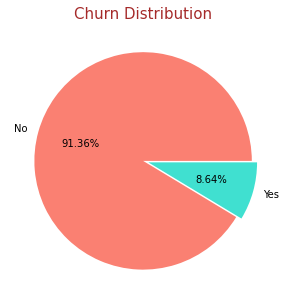

In [242]:
telecom.Churn.value_counts(normalize=True, dropna=False)

# Plotting the percentage of conversion in TARGET column

plt.figure(figsize=[5,5])
plt.pie(telecom.Churn.value_counts(normalize=True), labels= ['No', 'Yes'], 
        autopct='%.2f%%', explode=(0,0.05), colors=['salmon','turquoise'])
plt.title("Churn Distribution", fontsize=15, color= 'brown')
plt.show()

**Observations and Recommendations :**

**1. 8.64% of the total customers have churned and 91.36% have not churned.**

**2. There is huge Data imbalance in the target column - "churn"**

**3. "SMOTE" sampling can be used to handle this imbalance.**

## Univariate Analysis

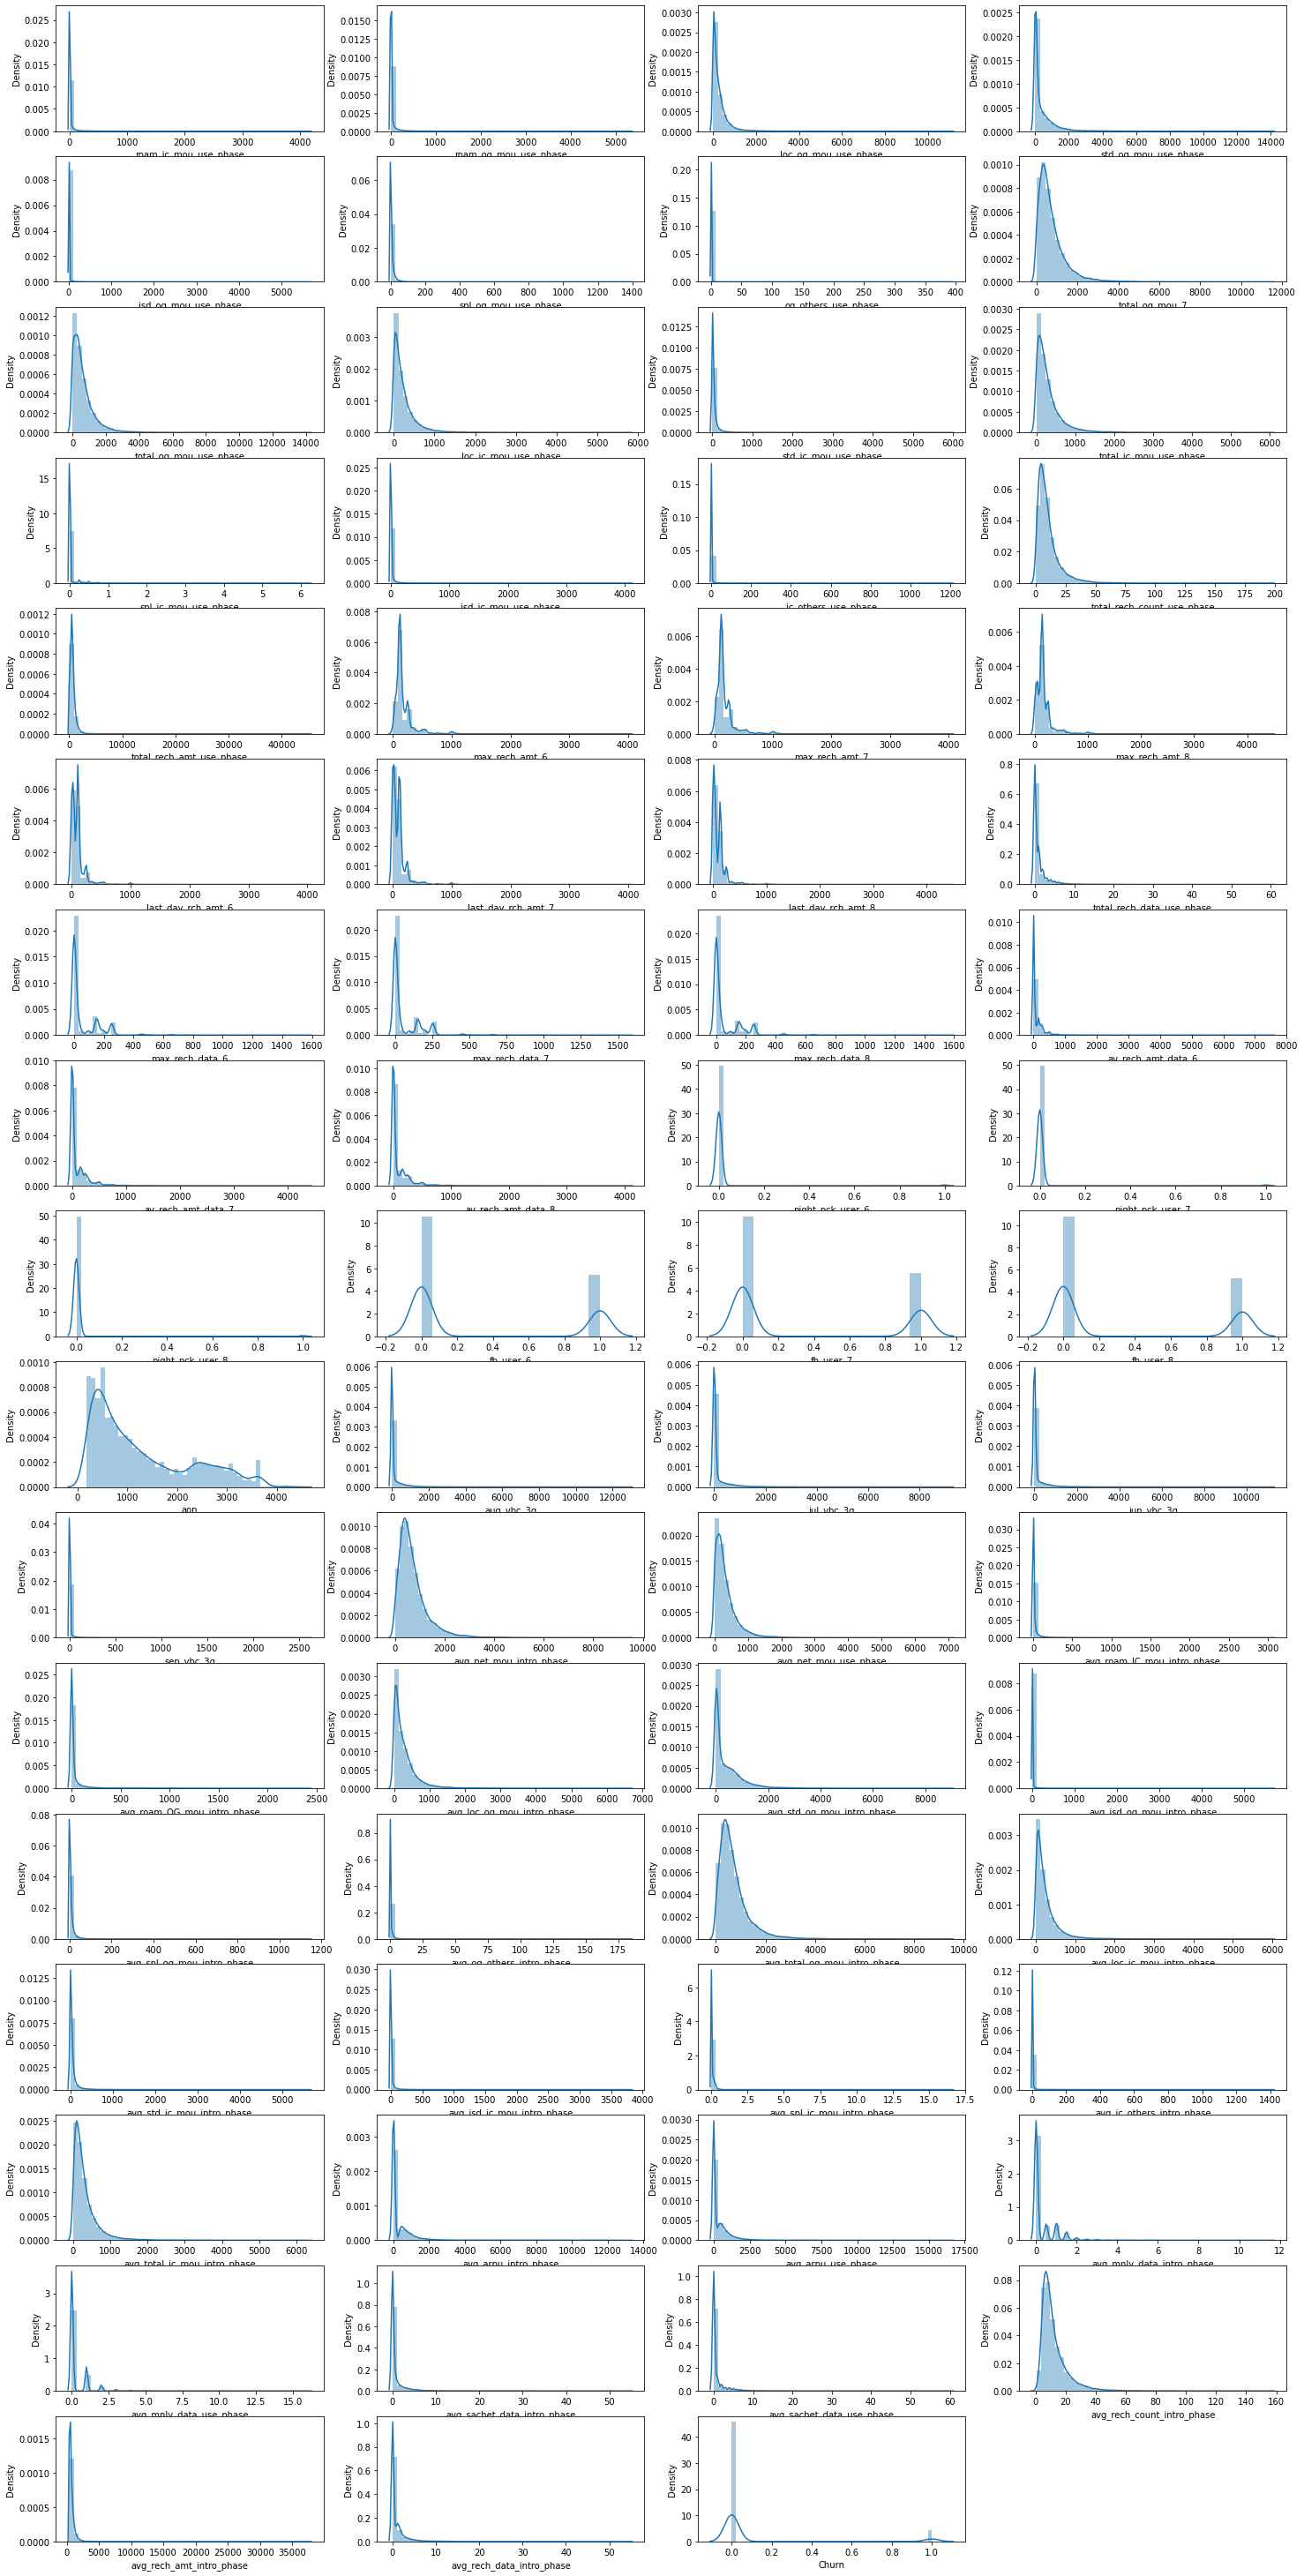

In [243]:
# Plotting distribution curve for continuous columns

plt.figure(figsize=(25,100))
for num,col in enumerate(numeric_cols):
    plt.subplot(32,4,en[num][0]+1)
    sns.distplot(telecom[col])
plt.show()

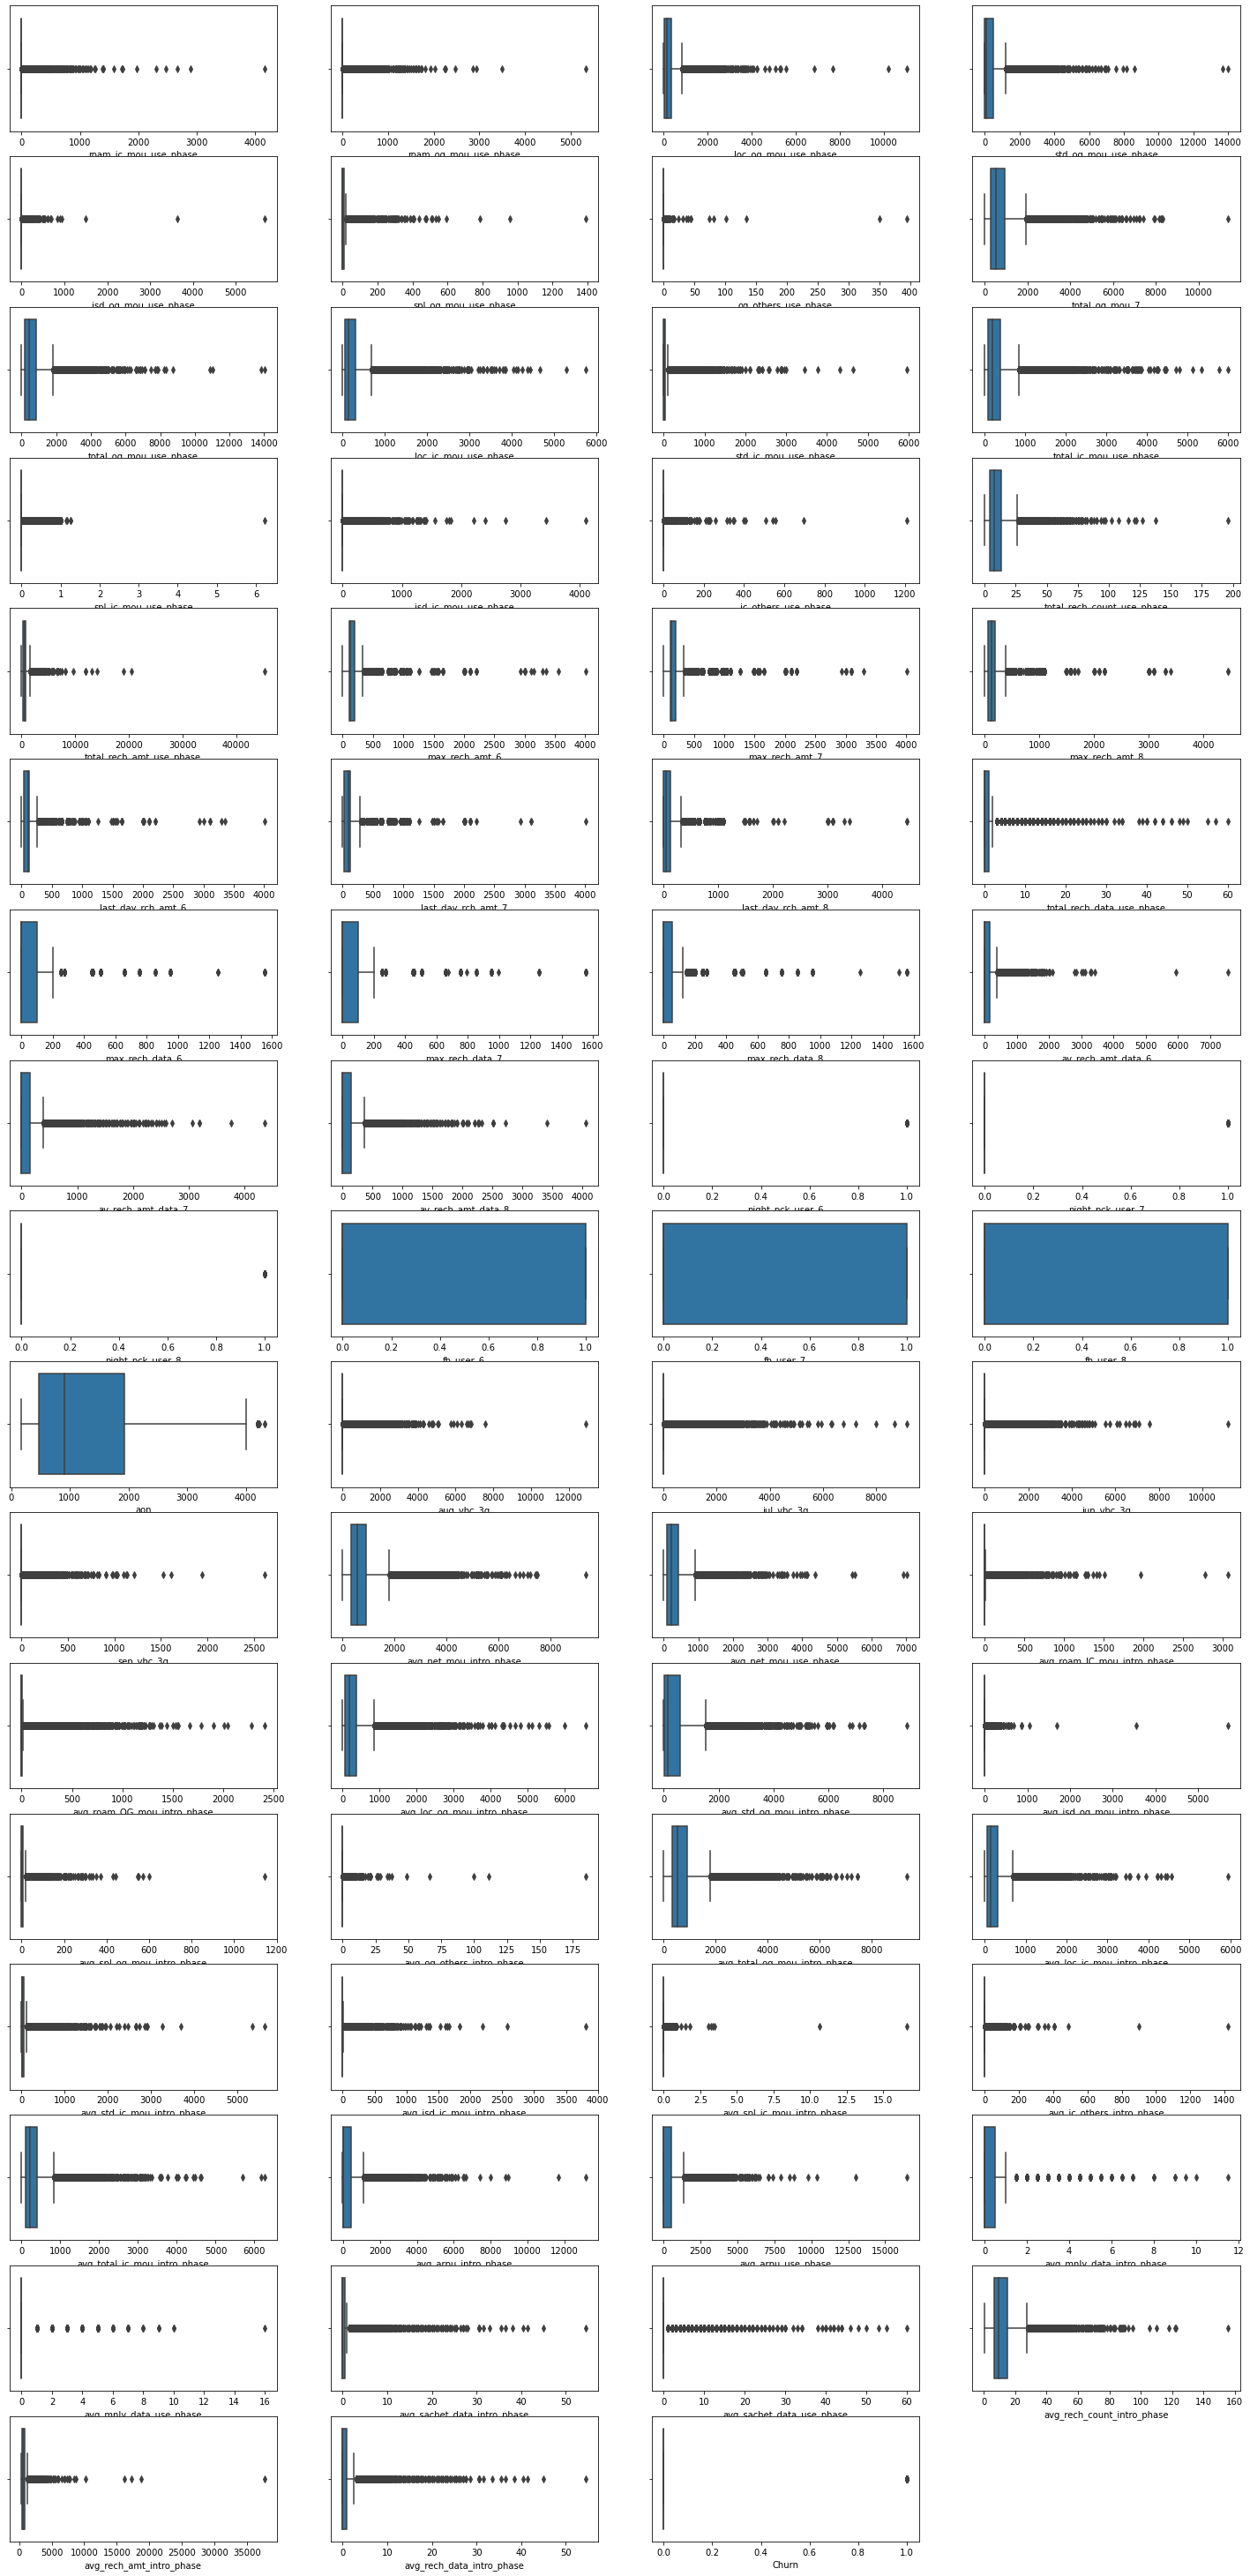

In [244]:
# Plotting boxplot on continuous columns for outlier detection

plt.figure(figsize=(25,100))
for num,col in enumerate(numeric_cols):
    plt.subplot(32,4,en[num][0]+1)
    sns.boxplot(telecom[col])
plt.show()

## Bivariate Analysis

In [245]:
# Analysing all continuous columns with respect to the target variable 'Converted' using bar plot and box plot

#for num in enumerate(numeric_cols):
    #plt.figure(figsize=(12,16))
    #plt.subplot(len(numeric_cols),num[0]+1,1)
    #plt.suptitle(num[1] +" vs Converted", x=0.5, y=0.9, fontsize=15, fontweight=5,color='Brown')
    
    #for pos in range(len(numeric_cols)):
        #plt.subplot(pos+1,2,1)
        #sns.barplot(telecom["Churn"],telecom[num[1]])
       # plt.subplot(pos+1,2,2)
        #sns.boxplot(telecom["Churn"],telecom[num[1]])
#plt.show()


## Multivariate Analysis

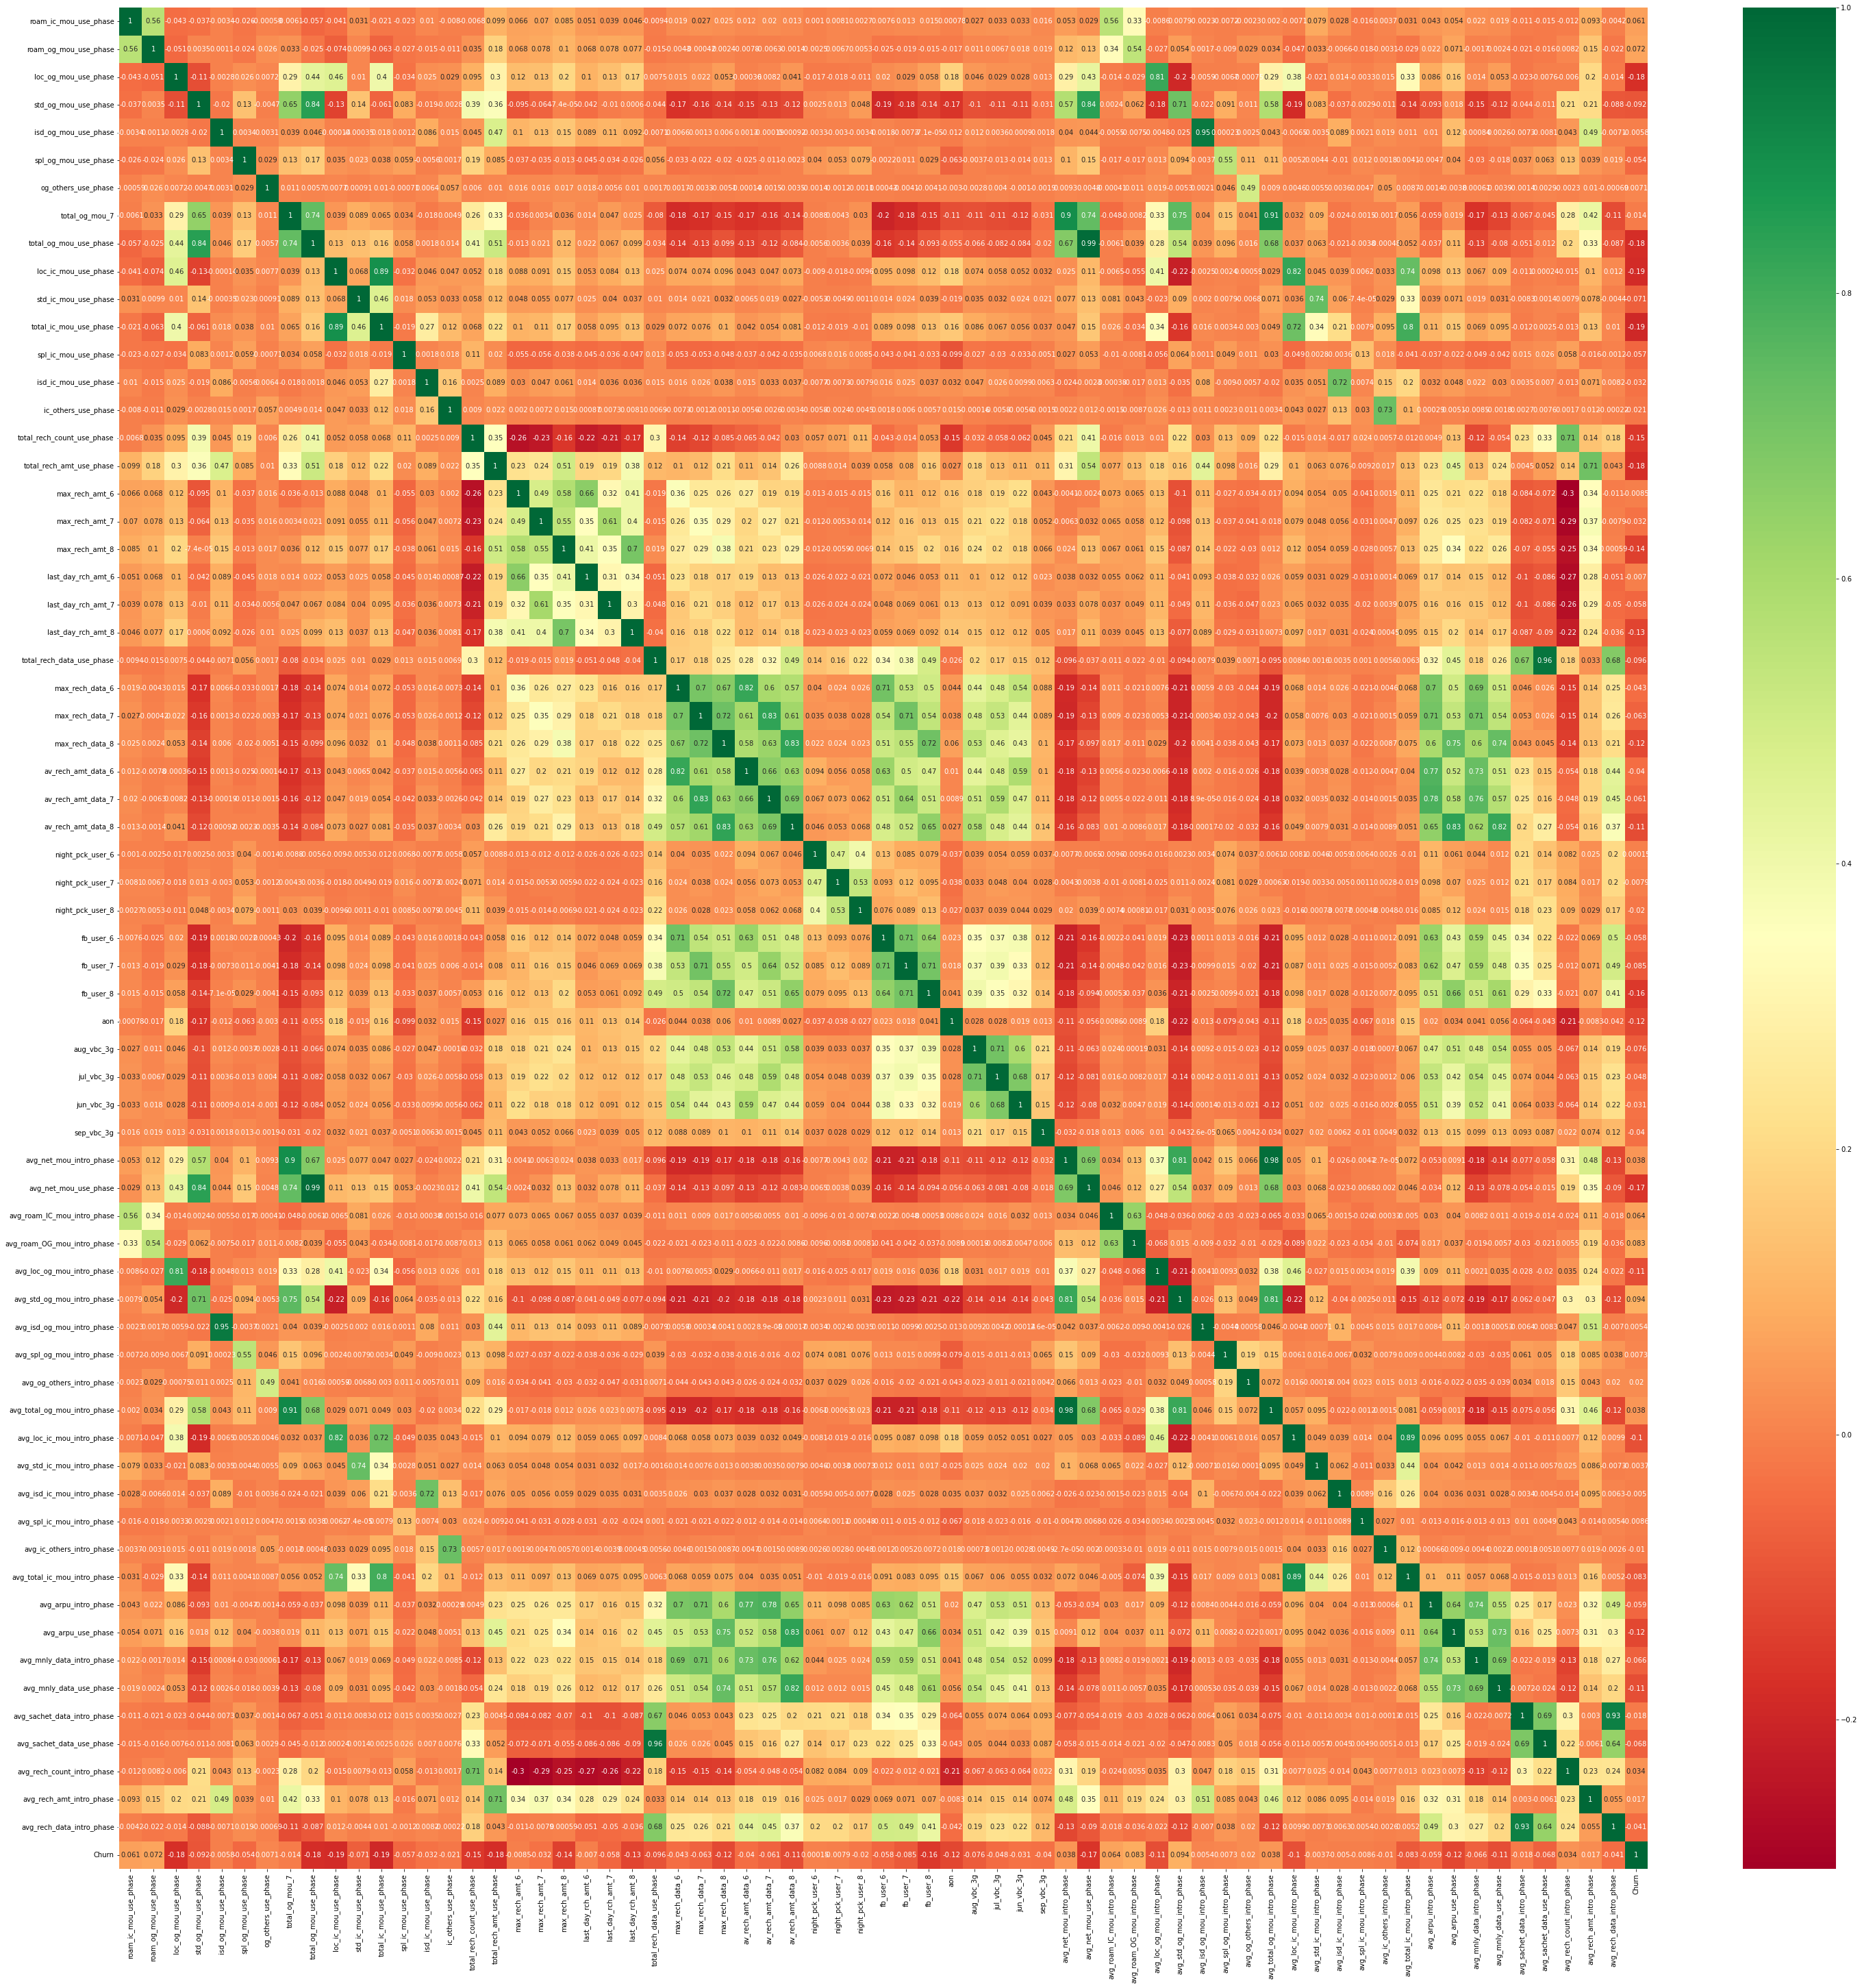

In [246]:
# Plotting a Heatmap for finding correlation of numerical variables, including the target variable.

plt.figure(figsize=(50,50))
sns.heatmap(telecom[numeric_cols].corr(),cmap="RdYlGn",annot=True)
plt.show()

# **Segment - III : Data Preparation For Model Building**

## Data Splitting

### Dividing data into X and y

In [247]:
# Separating X and y for 'telecom' dataset

X = telecom.drop(['Churn'], axis=1)
y = telecom['Churn']


In [248]:
X.head()

roam_ic_mou_use_phase  roam_og_mou_use_phase  loc_og_mou_use_phase  \
7                   31.64                  38.06                255.79   
8                    0.00                   0.00                 63.04   
13                  72.11                   1.44                353.99   
16                   0.00                   0.00                205.93   
17                   4.81                  13.34                  0.00   

    std_og_mou_use_phase  isd_og_mou_use_phase  spl_og_mou_use_phase  \
7                  77.84                 10.01                  6.50   
8                  98.28                  0.00                 10.23   
13                655.18                  1.29                  4.78   
16                 21.53                  0.00                  5.91   
17                  0.00                  0.00                  0.00   

    og_others_use_phase  total_og_mou_7  total_og_mou_use_phase  \
7                   0.0          609.24                  350.16   
8                   0.0          431.66                  171.56   
13                  0.0          192.41                 1015.26   
16                  0.0          286.01                  233.38   
17                  0.0            0.81                    0.00   

    loc_ic_mou_use_phase  std_ic_mou_use_phase  total_ic_mou_use_phase  \
7                 188.04                193.94                  428.74   
8                  15.79                  0.75                   16.54   
13                255.26                474.41                 1144.53   
16                211.78                 82.44                  294.46   
17                  0.00                  0.00                    0.00   

    spl_ic_mou_use_phase  isd_ic_mou_use_phase  ic_others_use_phase  \
7                    0.0                 31.59                15.14   
8                    0.0                  0.00                 0.00   
13                   0.0                393.39                21.44   
16                   0.0                  0.23                 0.00   
17                   0.0                  0.00                 0.00   

    total_rech_count_use_phase  total_rech_amt_use_phase  max_rech_amt_6  \
7                            7                      3638            1580   
8                           14                       120              90   
13                          11                       717             110   
16                           2                       160             110   
17                           4                        30             110   

    max_rech_amt_7  max_rech_amt_8  last_day_rch_amt_6  last_day_rch_amt_7  \
7              790            1580                   0                   0   
8              154              30                  50                   0   
13             110             130                 110                  50   
16             110             130                 100                 100   
17               0              30                  30                   0   

    last_day_rch_amt_8  total_rech_data_use_phase  max_rech_data_6  \
7                  779                        0.0              0.0   
8                   10                        3.0              0.0   
13                   0                        3.0              0.0   
16                 130                        0.0              0.0   
17                   0                        0.0              0.0   

    max_rech_data_7  max_rech_data_8  av_rech_amt_data_6  av_rech_amt_data_7  \
7               0.0              0.0                 0.0                 0.0   
8             154.0             23.0                 0.0               177.0   
13              0.0             23.0                 0.0                 0.0   
16              0.0              0.0                 0.0                 0.0   
17              0.0              0.0                 0.0                 0.0   

    av_rech_amt_data_8 

In [249]:
y.head()

7     1
8     0
13    0
16    0
17    0
Name: Churn, dtype: int32

### Splitting the Data into 'Training' and 'Testing' Sets


**The first basic step for Model Building is performing a train-test split.**

In [250]:
# Splitting dataframe into train and test sets, in 70:30 ratio for train and test respectively.

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100, stratify=y)

In [251]:
# Checking shape of training and testing datasets

print(X_train.shape)
print(y_train.shape)

print(X_test.shape)
print(y_test.shape)

(21007, 66)
(21007,)
(9004, 66)
(9004,)


In [252]:
#Checking the value counts of y variable in Train Data set

y_train.value_counts()

0    19192
1     1815
Name: Churn, dtype: int64

In [253]:
#Checking the value counts of y variable in Test Data set

y_test.value_counts()

0    8226
1     778
Name: Churn, dtype: int64

## Dealing with Data Imbalance

In [254]:
# Instantiate SMOTE

sm = SMOTE(random_state=27)

In [255]:
# Fitting SMOTE to the train set

X_train, y_train = sm.fit_sample(X_train, y_train)

## Rescaling the Features

In [256]:
numeric_cols_X = list(X_train.select_dtypes(exclude=['object']).columns)

In [257]:
# Instantiate the Scaler

scaler = StandardScaler()

# Fit the data into scaler and transform

X_train[numeric_cols_X] = scaler.fit_transform(X_train[numeric_cols_X])

# Checking the Head

X_train.head()

roam_ic_mou_use_phase  roam_og_mou_use_phase  loc_og_mou_use_phase  \
0               2.160079               6.100736             -0.526501   
1              -0.202357              -0.275582              0.214270   
2              -0.202357              -0.275582              0.405584   
3              -0.202357              -0.275582             -0.548239   
4              -0.202357              -0.275582              0.754417   

   std_og_mou_use_phase  isd_og_mou_use_phase  spl_og_mou_use_phase  \
0             -0.220803             -0.043856              0.185737   
1              1.375930             -0.043856             -0.013805   
2             -0.481472             -0.043856             -0.226291   
3             -0.493988             -0.043856             -0.271592   
4             -0.216877             -0.043856              0.154997   

   og_others_use_phase  total_og_mou_7  total_og_mou_use_phase  \
0            -0.018905        0.772006               -0.440486   
1            -0.018905        1.206677                1.294468   
2            -0.018905       -0.411883               -0.233587   
3            -0.018905       -0.960633               -0.701737   
4            -0.018905       -0.483739                0.174257   

   loc_ic_mou_use_phase  std_ic_mou_use_phase  total_ic_mou_use_phase  \
0             -0.527505              0.176555               -0.411606   
1             -0.003655              0.021021               -0.024940   
2              0.876392             -0.064150                0.723963   
3             -0.578559             -0.297214               -0.621846   
4              0.017746              4.617233                1.615411   

   spl_ic_mou_use_phase  isd_ic_mou_use_phase  ic_others_use_phase  \
0             -0.192948             -0.140568            -0.078947   
1             -0.192948             -0.140568            -0.078947   
2             -0.192948              0.057806            -0.078947   
3             -0.192948             -0.140568            -0.078947   
4             -0.192948             -0.140568            -0.065435   

   total_rech_count_use_phase  total_rech_amt_use_phase  max_rech_amt_6  \
0                    0.031357                  0.684398        0.200162   
1                    0.984151                  0.659788       -0.319173   
2                   -0.564139                  0.283065        0.678186   
3                    2.175143                  0.364468       -0.661462   
4                   -0.325940                  0.095650       -0.319173   

   max_rech_amt_7  max_rech_amt_8  last_day_rch_amt_6  last_day_rch_amt_7  \
0       -0.181981        0.688960            0.203272            0.299441   
1       -0.283318        0.142552            0.071556            0.157351   
2        0.668120        1.396077            1.308221           -0.710977   
3       -0.609847       -0.448855           -0.352861           -0.300495   
4       -0.181981        0.052555            0.071556            0.299441   

   last_day_rch_amt_8  total_rech_data_use_phase  max_rech_data_6  \
0            0.707896                   0.171750         1.468959   
1           -0.122489                  -0.353600        -0.465166   
2            1.538282                  -0.353600        -0.465166   
3           -0.197224                  12.780157         0.042786   
4            0.541819                  -0.353600        -0.465166   

   max_rech_data_7  max_rech_data_8  av_rech_amt_data_6  av_rech_amt_data_7  \
0        -0.370831         1.814331            0.696321           -0.380913   
1        -0.449272        -0.400732           -0.431939           -0.425751   
2        -0.449272        -0.400732           -0.431939           -0.425751   
3         0.060597         0.181002            1.773297            1.645201   
4        -0.449272        -0.400732           -0.431939           -0.425751   

   av_rech_amt_data_8  night_pck_user_6  night_pck_user_7  night_pck_user_8 

In [258]:
X_train[numeric_cols_X].describe()

roam_ic_mou_use_phase  roam_og_mou_use_phase  loc_og_mou_use_phase  \
count           3.838400e+04           3.838400e+04          3.838400e+04   
mean           -6.984611e-15          -1.974448e-14         -8.890371e-15   
std             1.000013e+00           1.000013e+00          1.000013e+00   
min            -2.023568e-01          -2.755824e-01         -5.482385e-01   
25%            -2.023568e-01          -2.755824e-01         -5.479681e-01   
50%            -2.023568e-01          -2.755824e-01         -3.950546e-01   
75%            -1.528673e-01          -1.763214e-01          1.596010e-01   
max             3.372630e+01           3.524528e+01          3.642809e+01   

       std_og_mou_use_phase  isd_og_mou_use_phase  spl_og_mou_use_phase  \
count          3.838400e+04          3.838400e+04          3.838400e+04   
mean           1.017280e-14         -6.373010e-15          9.873132e-15   
std            1.000013e+00          1.000013e+00          1.000013e+00   
min           -4.939878e-01         -4.385614e-02         -2.715920e-01   
25%           -4.939878e-01         -4.385614e-02         -2.715920e-01   
50%           -4.551694e-01         -4.385614e-02         -2.715920e-01   
75%            6.279676e-02         -4.385614e-02         -5.488324e-02   
max            2.527444e+01          1.627928e+02          7.473903e+01   

       og_others_use_phase  total_og_mou_7  total_og_mou_use_phase  \
count         3.838400e+04    3.838400e+04            3.838400e+04   
mean          6.355242e-16   -8.536488e-16           -1.070122e-14   
std           1.000013e+00    1.000013e+00            1.000013e+00   
min          -1.890545e-02   -9.606327e-01           -7.017366e-01   
25%          -1.890545e-02   -6.561572e-01           -6.982890e-01   
50%          -1.890545e-02   -2.567482e-01           -3.273993e-01   
75%          -1.890545e-02    3.250375e-01            2.822999e-01   
max           9.319130e+01    1.504612e+01            2.177973e+01   

       loc_ic_mou_use_phase  std_ic_mou_use_phase  total_ic_mou_use_phase  \
count          3.838400e+04          3.838400e+04            3.838400e+04   
mean          -2.681725e-14          1.420517e-14            2.231132e-14   
std            1.000013e+00          1.000013e+00            1.000013e+00   
min           -5.843239e-01         -2.972143e-01           -6.267046e-01   
25%           -5.802624e-01         -2.972143e-01           -6.195721e-01   
50%           -3.679348e-01         -2.530726e-01           -3.501220e-01   
75%            1.704159e-01         -5.068138e-02            2.051359e-01   
max            2.211497e+01          5.589051e+01            1.931134e+01   

       spl_ic_mou_use_phase  isd_ic_mou_use_phase  ic_others_use_phase  \
count          3.838400e+04          3.838400e+04         3.838400e+04   
mean          -2.326773e-14          2.811218e-14        -1.737288e-14   
std            1.000013e+00          1.000013e+00         1.000013e+00   
min           -1.929480e-01         -1.405678e-01        -7.894719e-02   
25%           -1.929480e-01         -1.405678e-01        -7.894719e-02   
50%           -1.929480e-01         -1.405678e-01        -7.894719e-02   
75%           -1.929480e-01         -1.405678e-01        -7.894719e-02   
max            1.428023e+01          6.088020e+01         1.089078e+02   

       total_rech_count_use_phase  total_rech_amt_use_phase  max_rech_amt_6  \
count                3.838400e+04              3.838400e+04    3.838400e+04   
mean                -9.357065e-15              1.776163e-14    1.360226e-15   
std                  1.000013e+00              1.000013e+00    1.000013e+00   
min                 -9.214364e-01             -8.319588e-01   -9.683419e-01   
25%                 -6.832380e-01             -7.751664e-01   -3.781884e-01   
50%                 -3.259404e-01             -1.864186e-01   -3.191730e-01   
75%                  2.695557e-01              3.758260e-01    4.082059e-02   
max          

In [260]:
# Transform the test set

X_test[numeric_cols_X] = scaler.transform(X_test[numeric_cols_X])
X_test.head()

roam_ic_mou_use_phase  roam_og_mou_use_phase  loc_og_mou_use_phase  \
50179              -0.202357              -0.275582             -0.423610   
20587              -0.202357              -0.275582              1.306655   
51116              -0.202357              -0.275582              2.354058   
70628              -0.202357              -0.275582              0.777126   
75091              -0.202357              -0.275582              0.002325   

       std_og_mou_use_phase  isd_og_mou_use_phase  spl_og_mou_use_phase  \
50179             -0.108956             -0.043856              0.509319   
20587             -0.443465             -0.043856              0.211624   
51116             -0.416609             -0.043856             -0.212808   
70628             -0.346825             -0.043856             -0.271592   
75091             -0.493988             -0.043856             -0.271592   

       og_others_use_phase  total_og_mou_7  total_og_mou_use_phase  \
50179            -0.018905        0.604423               -0.284559   
20587            -0.018905        0.148345                0.243096   
51116            -0.018905        0.734839                0.754454   
70628            -0.018905       -0.311352                0.059585   
75091            -0.018905       -0.675068               -0.438581   

       loc_ic_mou_use_phase  std_ic_mou_use_phase  total_ic_mou_use_phase  \
50179             -0.532875              0.292380               -0.354361   
20587              0.913903              0.001403                0.742368   
51116              9.216061             -0.290235                7.636420   
70628              0.479526              0.132979                0.431684   
75091              0.064931             -0.196198               -0.043811   

       spl_ic_mou_use_phase  isd_ic_mou_use_phase  ic_others_use_phase  \
50179             -0.192948             -0.056490             0.060680   
20587             -0.192948             -0.140568            -0.056427   
51116             -0.192948             -0.140568            -0.078947   
70628             -0.192948             -0.087953            -0.078947   
75091             -0.192948             -0.140568            -0.078947   

       total_rech_count_use_phase  total_rech_amt_use_phase  max_rech_amt_6  \
50179                   -0.564139                 -0.491204       -0.260158   
20587                    1.103250                  0.468587       -0.319173   
51116                    0.031357                  1.080052       -0.029998   
70628                   -0.325940                  0.095650       -0.319173   
75091                   -0.564139                 -0.453343        0.518845   

       max_rech_amt_7  max_rech_amt_8  last_day_rch_amt_6  last_day_rch_amt_7  \
50179       -0.227020        0.052555           -0.367496            0.236290   
20587       -0.227020        0.052555           -0.513847            0.236290   
51116        0.223365        0.206835            0.393528            0.315229   
70628       -0.181981        0.052555           -0.733373            0.299441   
75091        0.223365        0.502538           -0.104065           -0.710977   

       last_day_rch_amt_8  total_rech_data_use_phase  max_rech_data_6  \
50179           -0.122489                   -0.35360        -0.465166   
20587            0.541819                   -0.35360        -0.465166   
51116           -0.122489                    0.17175         1.039154   
70628            0.541819                   -0.35360        -0.465166   
75091            1.123089                   -0.35360         1.996448   

       max_rech_data_7  max_rech_data_8  av_rech_amt_data_6  \
50179        -0.449272        -0.400732           -0.431939   
20587        -0.449272        -0.400732           -0.431939   
51116         1.060726         1.322095            1.271848   
70628        -0.449272        -0.400732           -0.431939   
75091        -0.449272        -0.400732         

### Checking the Correlation Matrix

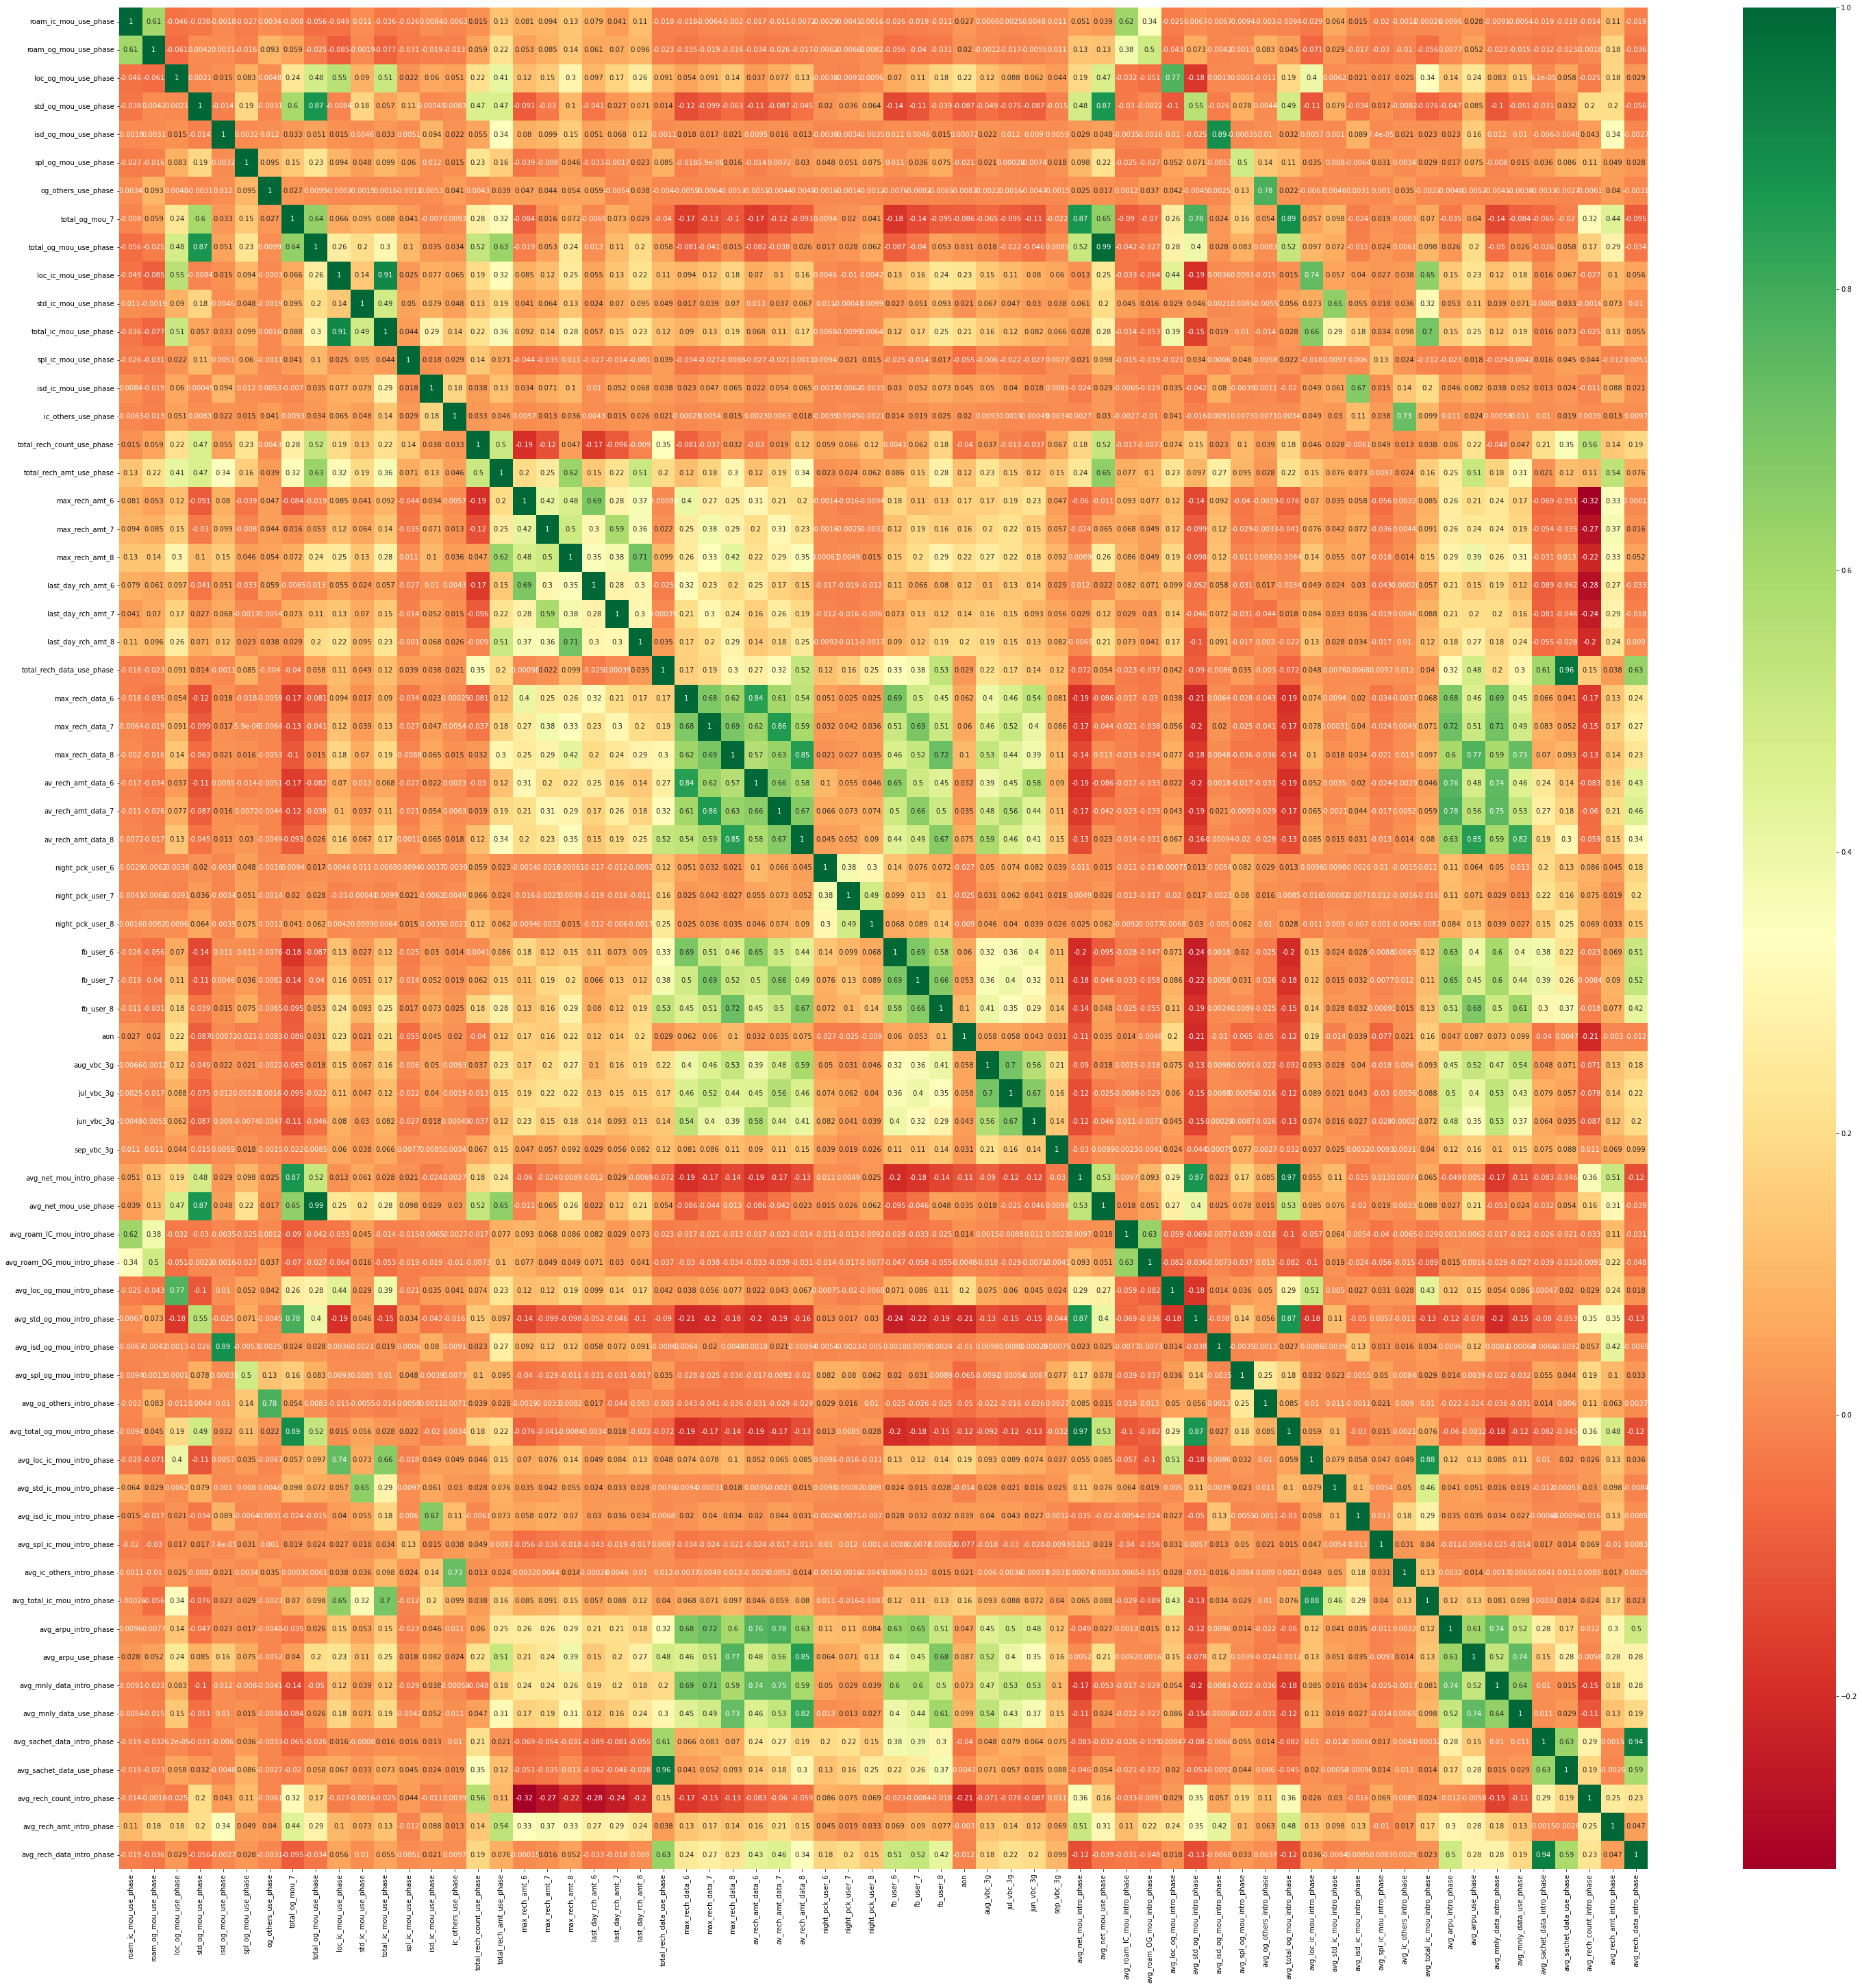

In [261]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (50,50))
sns.heatmap(X_train.corr(), annot = True, cmap="RdYlGn")
plt.show()

In [262]:
corr_df =pd.DataFrame(X_train.corr())

In [263]:
df_high_corr = corr_df[corr_df > 0.5]

In [264]:
df_high_corr

roam_ic_mou_use_phase  roam_og_mou_use_phase  \
roam_ic_mou_use_phase                      1.000000               0.608457   
roam_og_mou_use_phase                      0.608457               1.000000   
loc_og_mou_use_phase                            NaN                    NaN   
std_og_mou_use_phase                            NaN                    NaN   
isd_og_mou_use_phase                            NaN                    NaN   
spl_og_mou_use_phase                            NaN                    NaN   
og_others_use_phase                             NaN                    NaN   
total_og_mou_7                                  NaN                    NaN   
total_og_mou_use_phase                          NaN                    NaN   
loc_ic_mou_use_phase                            NaN                    NaN   
std_ic_mou_use_phase                            NaN                    NaN   
total_ic_mou_use_phase                          NaN                    NaN   
spl_ic_mou_use_phase                            NaN                    NaN   
isd_ic_mou_use_phase                            NaN                    NaN   
ic_others_use_phase                             NaN                    NaN   
total_rech_count_use_phase                      NaN                    NaN   
total_rech_amt_use_phase                        NaN                    NaN   
max_rech_amt_6                                  NaN                    NaN   
max_rech_amt_7                                  NaN                    NaN   
max_rech_amt_8                                  NaN                    NaN   
last_day_rch_amt_6                              NaN                    NaN   
last_day_rch_amt_7                              NaN                    NaN   
last_day_rch_amt_8                              NaN                    NaN   
total_rech_data_use_phase                       NaN                    NaN   
max_rech_data_6                                 NaN                    NaN   
max_rech_data_7                                 NaN                    NaN   
max_rech_data_8                                 NaN                    NaN   
av_rech_amt_data_6                              NaN                    NaN   
av_rech_amt_data_7                              NaN                    NaN   
av_rech_amt_data_8                              NaN                    NaN   
night_pck_user_6                                NaN                    NaN   
night_pck_user_7                                NaN                    NaN   
night_pck_user_8                                NaN                    NaN   
fb_user_6                                       NaN                    NaN   
fb_user_7                                       NaN                    NaN   
fb_user_8                                       NaN                    NaN   
aon                                             NaN                    NaN   
aug_vbc_3g                                      NaN                    NaN   
jul_vbc_3g                                      NaN                    NaN   
jun_vbc_3g                                      NaN                    NaN   
sep_vbc_3g                                      NaN                    NaN   
avg_net_mou_intro_phase                         NaN                    NaN   
avg_net_mou_use_phase                           NaN                    NaN   
avg_roam_IC_mou_intro_phase                0.617621                    NaN   
avg_roam_OG_mou_intro_phase                     NaN               0.503349   
avg_loc_og_mou_intro_phase                      NaN                    NaN   
avg_std_og_mou_intro_phase                      NaN                    NaN   
avg_isd_og_mou_intro_phase                      NaN                    NaN   
avg_spl_og_mou_intro_phase                      NaN                    NaN   
avg_og_others_intro_phase                       NaN                    NaN   
avg_total_og_mou_intro_phase                    NaN 

#  **Segment - IV : Model Building**

In [265]:
#Instantiate the Logistic Regression Function

logreg = LogisticRegression()

## RFE

**Creating logistic regression model using a mixed approach. Starting with using RFE to find 15 variables and gradually dropping variables one by one manually.**

### Step 8: Feature Selection Using RFE

In [266]:
# Running RFE with the output number of the variables equal to 15
rfe = RFE(logreg,15)
rfe = rfe.fit(X_train, y_train)

In [267]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('roam_ic_mou_use_phase', False, 49),
 ('roam_og_mou_use_phase', False, 11),
 ('loc_og_mou_use_phase', False, 21),
 ('std_og_mou_use_phase', True, 1),
 ('isd_og_mou_use_phase', False, 22),
 ('spl_og_mou_use_phase', False, 45),
 ('og_others_use_phase', False, 35),
 ('total_og_mou_7', True, 1),
 ('total_og_mou_use_phase', True, 1),
 ('loc_ic_mou_use_phase', False, 6),
 ('std_ic_mou_use_phase', False, 28),
 ('total_ic_mou_use_phase', True, 1),
 ('spl_ic_mou_use_phase', False, 2),
 ('isd_ic_mou_use_phase', False, 29),
 ('ic_others_use_phase', False, 19),
 ('total_rech_count_use_phase', True, 1),
 ('total_rech_amt_use_phase', False, 15),
 ('max_rech_amt_6', False, 25),
 ('max_rech_amt_7', False, 27),
 ('max_rech_amt_8', False, 26),
 ('last_day_rch_amt_6', False, 48),
 ('last_day_rch_amt_7', False, 17),
 ('last_day_rch_amt_8', True, 1),
 ('total_rech_data_use_phase', True, 1),
 ('max_rech_data_6', False, 30),
 ('max_rech_data_7', False, 33),
 ('max_rech_data_8', False, 31),
 ('av_rech_amt_d

In [268]:
# Features SELECTED by RFE

X_train.columns[rfe.support_]

Index(['std_og_mou_use_phase', 'total_og_mou_7', 'total_og_mou_use_phase',
       'total_ic_mou_use_phase', 'total_rech_count_use_phase',
       'last_day_rch_amt_8', 'total_rech_data_use_phase', 'sep_vbc_3g',
       'avg_net_mou_intro_phase', 'avg_roam_OG_mou_intro_phase',
       'avg_total_og_mou_intro_phase', 'avg_total_ic_mou_intro_phase',
       'avg_mnly_data_use_phase', 'avg_sachet_data_use_phase',
       'avg_rech_amt_intro_phase'],
      dtype='object')

In [269]:
# Features REJECTED by RFE

X_train.columns[~rfe.support_]

Index(['roam_ic_mou_use_phase', 'roam_og_mou_use_phase',
       'loc_og_mou_use_phase', 'isd_og_mou_use_phase', 'spl_og_mou_use_phase',
       'og_others_use_phase', 'loc_ic_mou_use_phase', 'std_ic_mou_use_phase',
       'spl_ic_mou_use_phase', 'isd_ic_mou_use_phase', 'ic_others_use_phase',
       'total_rech_amt_use_phase', 'max_rech_amt_6', 'max_rech_amt_7',
       'max_rech_amt_8', 'last_day_rch_amt_6', 'last_day_rch_amt_7',
       'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8',
       'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8',
       'night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8', 'fb_user_6',
       'fb_user_7', 'fb_user_8', 'aon', 'aug_vbc_3g', 'jul_vbc_3g',
       'jun_vbc_3g', 'avg_net_mou_use_phase', 'avg_roam_IC_mou_intro_phase',
       'avg_loc_og_mou_intro_phase', 'avg_std_og_mou_intro_phase',
       'avg_isd_og_mou_intro_phase', 'avg_spl_og_mou_intro_phase',
       'avg_og_others_intro_phase', 'avg_loc_ic_mou_intro_phase',
      

In [270]:
# Creating X_train_rfe dataframe with RFE selected variables

col = X_train.columns[rfe.support_]
X_train_rfe = X_train[col]
X_train_rfe.head()

std_og_mou_use_phase  total_og_mou_7  total_og_mou_use_phase  \
0             -0.220803        0.772006               -0.440486   
1              1.375930        1.206677                1.294468   
2             -0.481472       -0.411883               -0.233587   
3             -0.493988       -0.960633               -0.701737   
4             -0.216877       -0.483739                0.174257   

   total_ic_mou_use_phase  total_rech_count_use_phase  last_day_rch_amt_8  \
0               -0.411606                    0.031357            0.707896   
1               -0.024940                    0.984151           -0.122489   
2                0.723963                   -0.564139            1.538282   
3               -0.621846                    2.175143           -0.197224   
4                1.615411                   -0.325940            0.541819   

   total_rech_data_use_phase  sep_vbc_3g  avg_net_mou_intro_phase  \
0                   0.171750   -0.104792                 0.297142   
1                  -0.353600   -0.104792                 1.194993   
2                  -0.353600   -0.104792                -0.505399   
3                  12.780157   -0.104792                -1.131522   
4                  -0.353600   -0.104792                -0.377624   

   avg_roam_OG_mou_intro_phase  avg_total_og_mou_intro_phase  \
0                    -0.305973                      0.341591   
1                    -0.305973                      1.239459   
2                    -0.252278                     -0.491481   
3                    -0.305973                     -1.113608   
4                     0.045208                     -0.409282   

   avg_total_ic_mou_intro_phase  avg_mnly_data_use_phase  \
0                     -0.420372                 1.581205   
1                     -0.277726                -0.316696   
2                      0.560764                -0.316696   
3                     -0.818440                -0.316696   
4                      1.250319                -0.316696   

   avg_sachet_data_use_phase  avg_rech_amt_intro_phase  
0                  -0.258815                 -0.456882  
1                  -0.258815                  0.543256  
2                  -0.258815                 -0.323903  
3                  13.613655                  0.177842  
4                  -0.258815                 -0.690434

## Required conditions for feature selection :

**1. p-value < 0.05** -- Drop features which are the least helpful in prediction (drop p-value > 0.05).

**2. VIF < 5** -- Drop features that are redundant using correlations and VIF (drop VIF > 5).

## Function for calculating VIF

**Variance Inflation Factor or VIF**, gives a basic quantitative idea about how much the feature variables are correlated with each other. It is an extremely important parameter to test our linear model. The formula for calculating 'VIF' is:

$ VIF_i = \frac{1}{1 - {R_i}^2} $

In [271]:
# Defining a function for calculating VIF.
# We will be using this function to find the VIF for every model.

def findVIF(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = 'VIF', ascending = False)
    return vif

## Model_1

In [272]:
# Calculating the VIFs for RFE selected predictors

findVIF(X_train_rfe)

Features     VIF
6      total_rech_data_use_phase  130.70
13     avg_sachet_data_use_phase  119.28
10  avg_total_og_mou_intro_phase   40.37
8        avg_net_mou_intro_phase   37.85
12       avg_mnly_data_use_phase   10.90
2         total_og_mou_use_phase    7.07
1                 total_og_mou_7    6.29
0           std_og_mou_use_phase    5.50
3         total_ic_mou_use_phase    2.63
9    avg_roam_OG_mou_intro_phase    2.34
11  avg_total_ic_mou_intro_phase    2.14
4     total_rech_count_use_phase    1.70
14      avg_rech_amt_intro_phase    1.69
5             last_day_rch_amt_8    1.27
7                     sep_vbc_3g    1.04

In [273]:
# Adding a constant variable.

X_train_sm1 = sm.add_constant(X_train_rfe)

# Creating a fitted linear model
model_1 = sm.GLM(y_train, X_train_sm1, family = sm.families.Binomial()).fit()

# Summary of linear model
model_1.summary()

AttributeError: 'SMOTE' object has no attribute 'add_constant'

In [171]:
# Dropping 'avg_total_og_mou_intro_phase' because of very high VIF (73.36)

X_train_new = X_train_rfe.drop(['avg_total_og_mou_intro_phase'], axis = 1)

## Model_2

In [172]:
# Calculating the VIFs

findVIF(X_train_new)

Features   VIF
3         total_ic_mou_use_phase  6.74
2           loc_ic_mou_use_phase  5.36
11  avg_total_ic_mou_intro_phase  3.05
1         total_og_mou_use_phase  2.64
9        avg_net_mou_intro_phase  2.55
13      avg_rech_amt_intro_phase  1.72
12       avg_mnly_data_use_phase  1.68
7                      fb_user_8  1.65
0           loc_og_mou_use_phase  1.61
5     total_rech_count_use_phase  1.37
6             last_day_rch_amt_8  1.25
10   avg_roam_OG_mou_intro_phase  1.07
8                     sep_vbc_3g  1.04
4           spl_ic_mou_use_phase  1.02

In [173]:
# Adding a constant variable.

X_train_sm2 = sm.add_constant(X_train_new)

# Creating a fitted linear model
model_2 = sm.GLM(y_train, X_train_sm2, family = sm.families.Binomial()).fit()

# Summary of linear model
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                21007
Model:                            GLM   Df Residuals:                    20992
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4017.9
Date:                Sun, 27 Nov 2022   Deviance:                       8035.7
Time:                        15:45:26   Pearson chi2:                 1.01e+07
No. Iterations:                    10                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                           -4.3420      0.081    -53.886      0.000      -4.500      -4.184
loc_og_mou_use_phase            -0.7267      0.122     -5.938      0.000      -0.967      -0.487
total_og_mou_use_phase          -0.5984      0.069     -8.612      0.000      -0.735      -0.462
loc_ic_mou_use_phase            -0.7897      0.244     -3.237      0.001      -1.268      -0.311
total_ic_mou_use_phase          -1.5819      0.226     -7.014      0.000      -2.024      -1.140
spl_ic_mou_use_phase            -0.5950      0.087     -6.872      0.000      -0.765      -0.425
total_rech_count_use_phase      -0.5232      0.056     -9.410      0.000      -0.632      -0.414
last_day_rch_amt_8              -0.8339      0.067    -12.362      0.000      -0.966      -0.702
fb_user_8                       -0.3824      0.056     -6.824      0.000      -0.492      -0.273
sep_vbc_3g                      -0.9201      0.255     -3.610      0.000      -1.420      -0.420
avg_net_mou_intro_phase          0.1119      0.040      2.826      0.005       0.034       0.190
avg_roam_OG_mou_intro_phase      0.1057      0.022      4.715      0.000       0.062       0.150
avg_total_ic_mou_intro_phase     0.5082      0.057      8.890      0.000       0.396       0.620
avg_mnly_data_use_phase         -0.4357      0.091     -4.769      0.000      -0.615      -0.257
avg_rech_amt_intro_phase         0.3978      0.035     11.226      0.000       0.328       0.467
================================================================================================
"""

In [174]:
# Dropping 'total_ic_mou_use_phase' because of high VIF (6.74)

X_train_new = X_train_new.drop(['total_ic_mou_use_phase'], axis = 1)

## Model_3

In [175]:
# Calculating the VIFs

findVIF(X_train_new)

Features   VIF
2           loc_ic_mou_use_phase  2.56
1         total_og_mou_use_phase  2.55
8        avg_net_mou_intro_phase  2.52
10  avg_total_ic_mou_intro_phase  2.27
12      avg_rech_amt_intro_phase  1.72
11       avg_mnly_data_use_phase  1.68
6                      fb_user_8  1.65
0           loc_og_mou_use_phase  1.60
4     total_rech_count_use_phase  1.37
5             last_day_rch_amt_8  1.25
9    avg_roam_OG_mou_intro_phase  1.06
7                     sep_vbc_3g  1.04
3           spl_ic_mou_use_phase  1.02

In [176]:
# Adding a constant variable.

X_train_sm3 = sm.add_constant(X_train_new)

# Creating a fitted linear model
model_3 = sm.GLM(y_train, X_train_sm3, family = sm.families.Binomial()).fit()

# Summary of linear model
model_3.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                21007
Model:                            GLM   Df Residuals:                    20993
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4062.7
Date:                Sun, 27 Nov 2022   Deviance:                       8125.4
Time:                        15:48:20   Pearson chi2:                 2.37e+07
No. Iterations:                    10                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                           -4.3419      0.081    -53.402      0.000      -4.501      -4.183
loc_og_mou_use_phase            -0.6751      0.124     -5.434      0.000      -0.919      -0.432
total_og_mou_use_phase          -0.7553      0.069    -10.885      0.000      -0.891      -0.619
loc_ic_mou_use_phase            -2.0680      0.145    -14.234      0.000      -2.353      -1.783
spl_ic_mou_use_phase            -0.6129      0.087     -7.039      0.000      -0.784      -0.442
total_rech_count_use_phase      -0.5539      0.056     -9.908      0.000      -0.664      -0.444
last_day_rch_amt_8              -0.8664      0.067    -12.954      0.000      -0.998      -0.735
fb_user_8                       -0.3861      0.055     -6.956      0.000      -0.495      -0.277
sep_vbc_3g                      -0.9574      0.259     -3.701      0.000      -1.464      -0.450
avg_net_mou_intro_phase          0.1533      0.039      3.915      0.000       0.077       0.230
avg_roam_OG_mou_intro_phase      0.0913      0.022      4.086      0.000       0.048       0.135
avg_total_ic_mou_intro_phase     0.2435      0.040      6.133      0.000       0.166       0.321
avg_mnly_data_use_phase         -0.4590      0.090     -5.075      0.000      -0.636      -0.282
avg_rech_amt_intro_phase         0.4130      0.035     11.634      0.000       0.343       0.483
================================================================================================
"""

In [177]:
model_3.params

const                          -4.341895
loc_og_mou_use_phase           -0.675091
total_og_mou_use_phase         -0.755299
loc_ic_mou_use_phase           -2.068008
spl_ic_mou_use_phase           -0.612940
total_rech_count_use_phase     -0.553936
last_day_rch_amt_8             -0.866433
fb_user_8                      -0.386056
sep_vbc_3g                     -0.957433
avg_net_mou_intro_phase         0.153337
avg_roam_OG_mou_intro_phase     0.091325
avg_total_ic_mou_intro_phase    0.243545
avg_mnly_data_use_phase        -0.458977
avg_rech_amt_intro_phase        0.413015
dtype: float64

# **Segment V : Model Evaluation**

## Predicting the training data with Model-3

In [178]:
# Getting the predicted values on the train set

# y_train_pred with final model --> model_3

y_train_pred = model_3.predict(X_train_sm3)
y_train_pred[:10]

76985    0.042332
77814    0.032876
24787    0.007686
60192    0.068398
69896    0.040033
15968    0.037806
10588    0.016168
70529    0.002803
72848    0.010944
2048     0.020164
dtype: float64

In [179]:
y_train_pred.values

array([0.0423319 , 0.03287577, 0.00768579, ..., 0.0111247 , 0.00054425,
       0.00175429])

In [180]:
# Reshaping to an array

y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.0423319 , 0.03287577, 0.00768579, 0.06839837, 0.04003298,
       0.03780561, 0.01616799, 0.00280261, 0.01094382, 0.02016352])

In [181]:
y_train.head()

76985    0
77814    0
24787    0
60192    0
69896    0
Name: Churn, dtype: int32

In [ ]:
y_train_pred_final = pd.DataFrame({'Churn' : y_train.values, 'Churn_prob' : y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

##### Assessing the model with StatsModels

In [ ]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

In [ ]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

In [ ]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

##### Creating a dataframe with the actual churn flag and the predicted probabilities

In [ ]:
y_train_pred_final = pd.DataFrame({'Churn':y_train.values, 'Churn_Prob':y_train_pred})
y_train_pred_final['CustID'] = y_train.index
y_train_pred_final.head()

##### Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0

In [ ]:
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

In [ ]:
from sklearn import metrics

In [ ]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted )
print(confusion)

In [ ]:
# Predicted     not_churn    churn
# Actual
# not_churn        3270      365
# churn            579       708  

In [ ]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted))

#### Checking VIFs

In [ ]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

There are a few variables with high VIF. It's best to drop these variables as they aren't helping much with prediction and unnecessarily making the model complex. The variable 'PhoneService' has the highest VIF. So let's start by dropping that.

In [ ]:
col = col.drop('PhoneService', 1)
col

In [ ]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

In [ ]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [ ]:
y_train_pred[:10]

In [ ]:
y_train_pred_final['Churn_Prob'] = y_train_pred

In [ ]:
# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

In [ ]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted))

So overall the accuracy hasn't dropped much.

##### Let's check the VIFs again

In [ ]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

In [ ]:
# Let's drop TotalCharges since it has a high VIF
col = col.drop('TotalCharges')
col

In [ ]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

In [ ]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [ ]:
y_train_pred[:10]

In [ ]:
y_train_pred_final['Churn_Prob'] = y_train_pred

In [ ]:
# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

In [ ]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted))

The accuracy is still practically the same.

##### Let's now check the VIFs again

In [ ]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

All variables have a good value of VIF. So we need not drop any more variables and we can proceed with making predictions using this model only

In [ ]:
# Let's take a look at the confusion matrix again 
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted )
confusion

In [ ]:
# Actual/Predicted     not_churn    churn
        # not_churn        3269      366
        # churn            595       692  

In [ ]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted)

## Metrics beyond simply accuracy

In [ ]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [ ]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

In [ ]:
# Let us calculate specificity
TN / float(TN+FP)

In [ ]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

In [ ]:
# positive predictive value 
print (TP / float(TP+FP))

In [ ]:
# Negative predictive value
print (TN / float(TN+ FN))

### Step 9: Plotting the ROC Curve

An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [ ]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False)
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [ ]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Churn, y_train_pred_final.Churn_Prob, drop_intermediate = False )

In [ ]:
draw_roc(y_train_pred_final.Churn, y_train_pred_final.Churn_Prob)

### Step 10: Finding Optimal Cutoff Point

Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [ ]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

In [ ]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

In [ ]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### From the curve above, 0.3 is the optimum point to take it as a cutoff probability.

In [ ]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Churn_Prob.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

In [ ]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.final_predicted)

In [ ]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.final_predicted )
confusion2

In [ ]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [ ]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

In [ ]:
# Let us calculate specificity
TN / float(TN+FP)

In [ ]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

In [ ]:
# Positive predictive value 
print (TP / float(TP+FP))

In [ ]:
# Negative predictive value
print (TN / float(TN+ FN))

## Precision and Recall

In [ ]:
#Looking at the confusion matrix again

In [ ]:
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted )
confusion

##### Precision
TP / TP + FP

In [ ]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])

##### Recall
TP / TP + FN

In [ ]:
confusion[1,1]/(confusion[1,0]+confusion[1,1])

Using sklearn utilities for the same

In [ ]:
from sklearn.metrics import precision_score, recall_score

In [ ]:
?precision_score

In [ ]:
precision_score(y_train_pred_final.Churn, y_train_pred_final.predicted)

In [ ]:
recall_score(y_train_pred_final.Churn, y_train_pred_final.predicted)

### Precision and recall tradeoff

In [ ]:
from sklearn.metrics import precision_recall_curve

In [ ]:
y_train_pred_final.Churn, y_train_pred_final.predicted

In [ ]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Churn, y_train_pred_final.Churn_Prob)

In [ ]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

### Step 11: Making predictions on the test set

In [ ]:
X_test[['tenure','MonthlyCharges','TotalCharges']] = scaler.transform(X_test[['tenure','MonthlyCharges','TotalCharges']])

In [ ]:
X_test = X_test[col]
X_test.head()

In [ ]:
X_test_sm = sm.add_constant(X_test)

Making predictions on the test set

In [ ]:
y_test_pred = res.predict(X_test_sm)

In [ ]:
y_test_pred[:10]

In [ ]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [ ]:
# Let's see the head
y_pred_1.head()

In [ ]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [ ]:
# Putting CustID to index
y_test_df['CustID'] = y_test_df.index

In [ ]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [ ]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [ ]:
y_pred_final.head()

In [ ]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Churn_Prob'})

In [ ]:
# Rearranging the columns
y_pred_final = y_pred_final[['CustID','Churn','Churn_Prob']]

In [ ]:
# Let's see the head of y_pred_final
y_pred_final.head()

In [ ]:
y_pred_final['final_predicted'] = y_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.42 else 0)

In [ ]:
y_pred_final.head()

In [ ]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Churn, y_pred_final.final_predicted)

In [ ]:
confusion2 = metrics.confusion_matrix(y_pred_final.Churn, y_pred_final.final_predicted )
confusion2

In [ ]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [ ]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

In [ ]:
# Let us calculate specificity
TN / float(TN+FP)

## Using Decision Trees

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=100)

In [ ]:
X_train.shape, X_test.shape

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dt_base = DecisionTreeClassifier(random_state=42, max_depth=4)

In [ ]:
dt_base.fit(X_train, y_train)

In [ ]:
y_train_pred = dt_base.predict(X_train)
y_test_pred = dt_base.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test, y_test_pred))

#### Plot the ROC curve

In [ ]:
from sklearn.metrics import plot_roc_curve

In [ ]:
plot_roc_curve(dt_base, X_train, y_train, drop_intermediate=False)
plt.show()

#### Hyper-parameter tuning for the Decision Tree

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
dt = DecisionTreeClassifier(random_state=42)

In [ ]:
params = {
    "max_depth": [2,3,5,10,20],
    "min_samples_leaf": [5,10,20,50,100,500]
}

In [ ]:
grid_search = GridSearchCV(estimator=dt,
                           param_grid=params,
                           cv=4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

In [ ]:
%%time
grid_search.fit(X_train, y_train)

In [ ]:
grid_search.best_score_

In [ ]:
dt_best = grid_search.best_estimator_
dt_best

In [ ]:
plot_roc_curve(dt_best, X_train, y_train)
plt.show()

## Using Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf = RandomForestClassifier(n_estimators=10, max_depth=4, max_features=5, random_state=100, oob_score=True)

In [ ]:
%%time
rf.fit(X_train, y_train)

In [ ]:
rf.oob_score_

In [ ]:
plot_roc_curve(rf, X_train, y_train)
plt.show()

### Hyper-parameter tuning for the Random Forest

In [ ]:
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

In [ ]:
params = {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50,100,200],
    'n_estimators': [10, 25, 50, 100]
}

In [ ]:
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

In [ ]:
%%time
grid_search.fit(X_train, y_train)

In [ ]:
grid_search.best_score_

In [ ]:
rf_best = grid_search.best_estimator_
rf_best

In [ ]:
plot_roc_curve(rf_best, X_train, y_train)
plt.show()

In [ ]:
rf_best.feature_importances_

In [ ]:
imp_df = pd.DataFrame({
    "Varname": X_train.columns,
    "Imp": rf_best.feature_importances_
})

In [ ]:
imp_df.sort_values(by="Imp", ascending=False)

In [ ]:
## test ##

In [ ]:
## Test by Vaibhav##